# Important Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from pandas import DataFrame

time_file = 'cleandata.csv'
CleanData = pd.read_csv(time_file, sep=',', header=0, encoding = 'iso-8859-1')
CleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31403 entries, 0 to 31402
Data columns (total 27 columns):
Unnamed: 0                31403 non-null int64
Event.Date                31403 non-null object
Country                   31403 non-null object
Latitude                  31403 non-null float64
Longitude                 31403 non-null float64
Airport.Code              31403 non-null object
Aircraft.Damage           31403 non-null object
Aircraft.Category         31403 non-null object
Make                      31403 non-null object
Model                     31403 non-null object
Amateur.Built             31403 non-null object
Number.of.Engines         31403 non-null float64
Engine.Type               31403 non-null object
Purpose.of.Flight         31403 non-null object
Total.Fatal.Injuries      31403 non-null float64
Total.Serious.Injuries    31403 non-null float64
Total.Minor.Injuries      31403 non-null float64
Total.Uninjured           31403 non-null float64
Weather.Condition    

# Creating Labelling Functions

### <font color = #D00020> We are using countplot throughout the entire analysis to compare values between various type of variables. This may not be done using other types of plots because we only need to see the trend between each type of variable.</font>

In [2]:
#Attach a text label above each bar displaying its height
def autolabel(subplot):
    for comp in subplot.patches:
        height = comp.get_height()
        ax.text(comp.get_x() + comp.get_width()/2., 1.01*height, '%d' % int(height), ha='center', va='bottom', fontsize=15, color='black') 

In [3]:
#Attach a text label above each bar displaying its height in percentage
def autolabel_percent(subplot):
    for comp in subplot.patches:
        height = comp.get_height()
        ax.text(comp.get_x() + comp.get_width()/2., 1.01*height, '%.2f%%' % round(height,2), ha='center', va='bottom', fontsize=15, color='black')

In [4]:
#Creates a Control Countplot for each of the predictor variable
def control_countplot(predictor, order):
    tes = sb.catplot(x=predictor, data = CleanData, order = order, kind='count', height=10)
    for i, bar in enumerate(tes.ax.patches):
        h = bar.get_height()
        tes.ax.text(
            i, # bar index (x coordinate of text)
            1.02*h, # y coordinate of text
            '{} ({}%)'.format(int(h), round(h/len(CleanData) * 100,2)),  # y label
            ha='center', 
            va='center', 
            fontsize=12)

In [5]:
#Creates a Control Percentageplot for each of the predictor variable
def control_percentageplot(predictor, ylimit, order):
    tes = sb.catplot(x=predictor, y=predictor, data = CleanData, order = order, kind='bar', height=10, aspect=1.5,
                    orient="v", estimator=lambda x: len(x) / len(CleanData) * 100)
    tes.set(ylabel="Percent", ylim = (0,ylimit))
    for i, bar in enumerate(tes.ax.patches):
        h = bar.get_height()
        tes.ax.text(
            i, # bar index (x coordinate of text)
            1.02*h, # y coordinate of text
            '{}%'.format(round(h,2)),  # y label
            ha='center', 
            va='center', 
            fontsize=12)

In [6]:
#Creates a Countplot using Severity_Class for each of the predictor variable
def severity_countplot (predictor, order):
    ax = sb.catplot(x=predictor, hue='Severity_Class', data = CleanData, kind = "count", 
                    height=8, aspect=1.7, order = order)

In [7]:
#Note: To save HD Pictures - ax.figure.savefig("name.png", dpi=300) or ax.savefig("name.png", dpi=300)

# Control Countplot of Severity Distribution

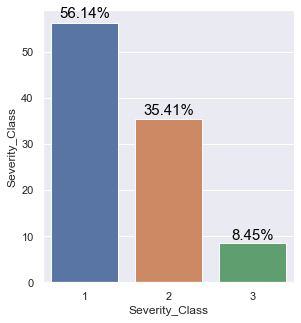

In [8]:
#Countplot of each Severity class in percentage
f, axes = plt.subplots(1, 1, figsize=(4.5, 5))
ax = sb.barplot(x=CleanData["Severity_Class"], y = CleanData["Severity_Class"],  orient="v", estimator=lambda x: len(x) / len(CleanData) * 100)
autolabel_percent(ax)

# <ins>Analysis 1: Flight Details</ins>

## 1. Broad Phase of Flight

In [9]:
#Initialising Phaselist with every index in Broad.Phase.of.Flight
PhaseList = CleanData["Broad.Phase.of.Flight"].value_counts().index

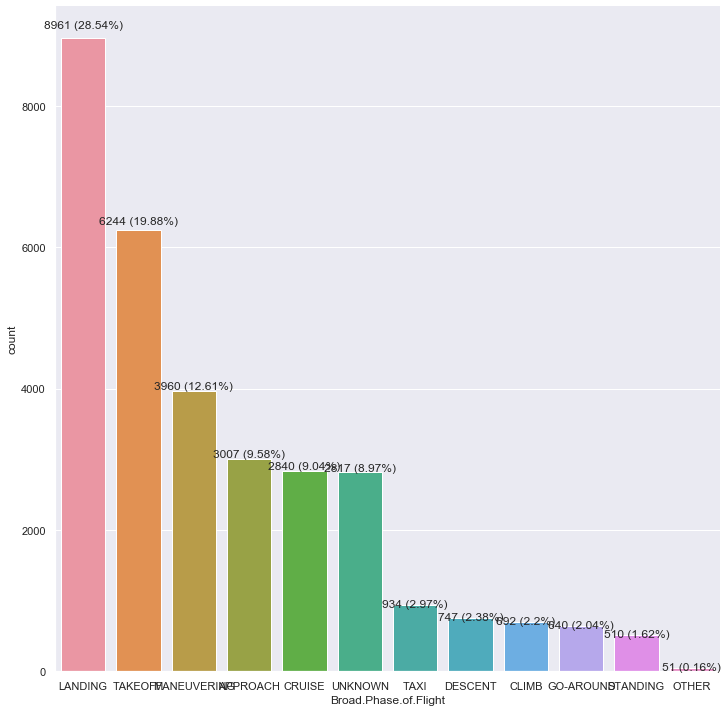

In [10]:
#Creating a control countplot for Broad.Phase.of.Flight
control_countplot("Broad.Phase.of.Flight", PhaseList)

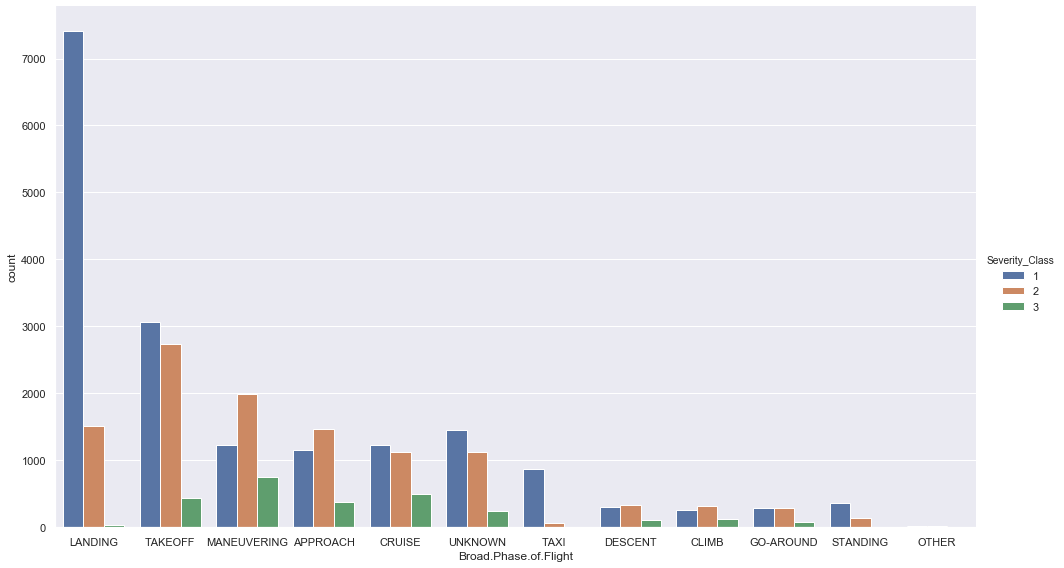

In [12]:
#Creating a countplot for Broad.Phase.of.Flight broken down into severity class
severity_countplot("Broad.Phase.of.Flight", PhaseList)

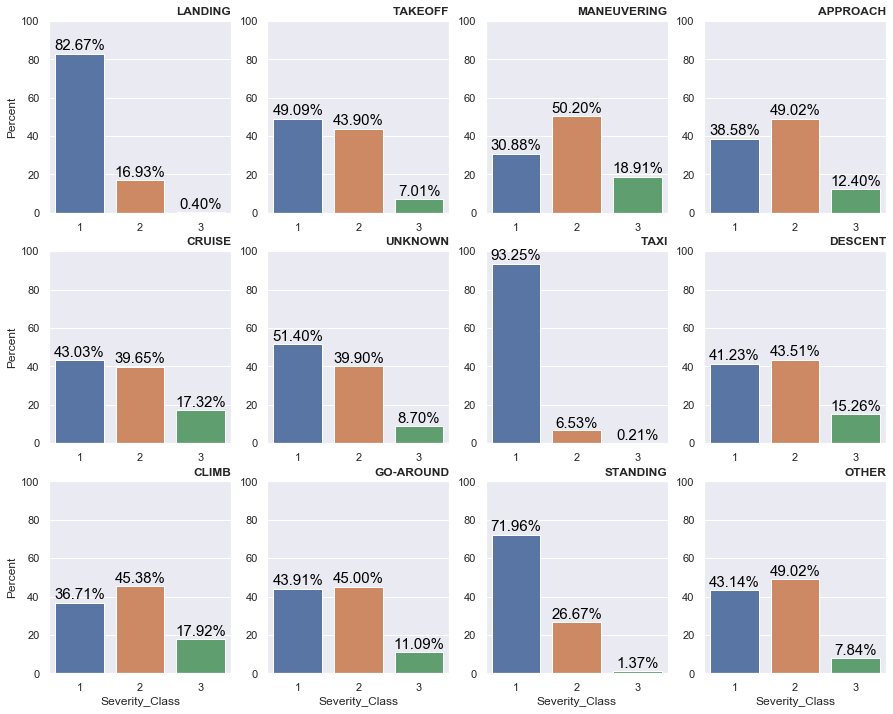

In [13]:
#Bar plot of each Severity class in percentage for each of the index in Broad.Phase.of.Flight
f, axes = plt.subplots(3, 4, figsize=(15, 12))
for num in range (0, 12):
    df = CleanData[CleanData["Broad.Phase.of.Flight"]==PhaseList[num]]
    ax = sb.barplot(x="Severity_Class", y="Broad.Phase.of.Flight", data=df, orient="v", estimator=lambda x: len(x) / len(df) * 100, 
                    ax = axes[(num)//4, (num)%4])
    ax.set(ylim=(0,100))
    ax.set_title(PhaseList[num], loc = 'right', fontdict = {'fontweight':'bold'})
    autolabel_percent(ax)
    
    #Making the axes label show only on the bottom and the left sides; Decluttering the plot
    if(num%4==0):ax.set(ylabel="Percent") 
    else:ax.set(ylabel="")
    if(num//4==2):ax.set(xlabel="Severity_Class")
    else:ax.set(xlabel="")

### <font color = #800000> From the graph, it can be seen that an accident during the maneuvering or approach phase has a relatively higher chance of having a higher severity. Meanwhile, an accident during landing or taxi phase has a relatively lower chance of having a lower severity.</font>

## 2. Weather Condition

In [14]:
#Initialising Phaselist with every index in Weather.Condition
WeatherList = CleanData["Weather.Condition"].value_counts().index

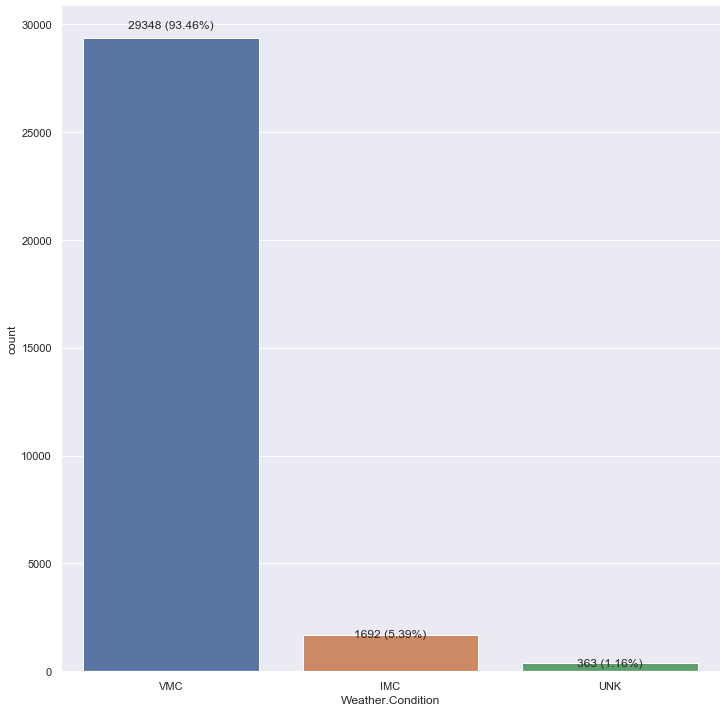

In [15]:
#Creating a control plot for Weather.Condition
control_countplot("Weather.Condition", WeatherList)

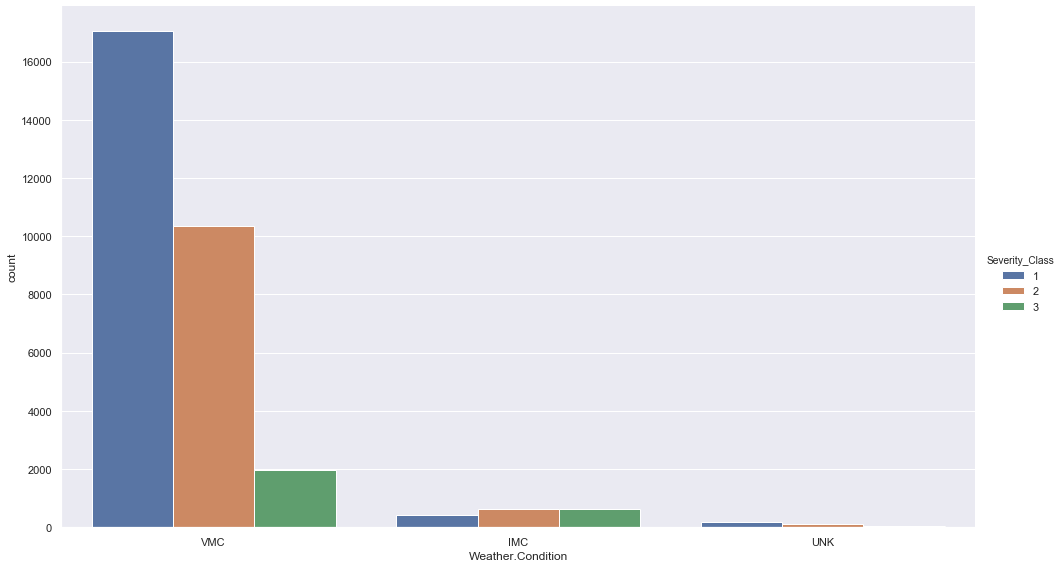

In [16]:
#Creating a countplot for Weather.Condition broken down into severity class
severity_countplot("Weather.Condition",WeatherList)

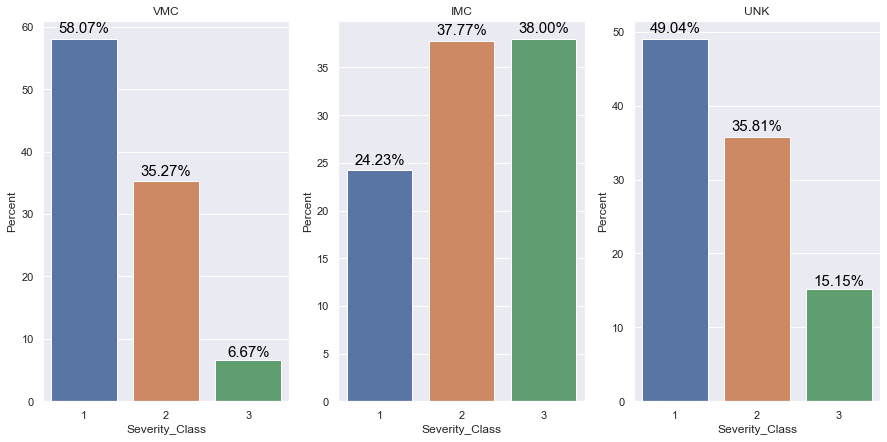

In [17]:
#Bar plot of each Severity class in percentage for each of the index in Weather.Condition
f, axes = plt.subplots(1, 3, figsize=(15, 7))
for num in range (0, 3):
    df = CleanData[CleanData["Weather.Condition"]==WeatherList[num]]
    ax = sb.barplot(x="Severity_Class", y="Weather.Condition", data=df, orient="v", 
                    estimator=lambda x: len(x) / len(df) * 100, ax = axes[num])
    ax.set(ylabel="Percent")
    ax.set_title(WeatherList[num])
    autolabel_percent(ax)

### <font color = #800000> From the graph, it can be seen that an accident will more likely be _far more severe_ when it occurs during an inclement weather, that is IMC.</font>

## 3. Purpose of Flight

In [18]:
CleanData["Purpose.of.Flight"].value_counts()

Personal                     19644
Instructional                 4214
Unknown                       1960
Aerial Application            1527
Business                       915
Positioning                    766
Other Work Use                 475
Flight Test                    341
Aerial Observation             306
Public Aircraft                222
Ferry                          170
Air Race/Show                  137
Executive/Corporate            133
Skydiving                      130
Banner Tow                      93
Public Aircraft - Federal       87
External Load                   84
Public Aircraft - Local         67
Public Aircraft - State         58
Glider Tow                      48
Firefighting                    17
Air Drop                         9
Name: Purpose.of.Flight, dtype: int64

In [19]:
#Initialising PurposeList with top 10 useful value in Purpose.of.Flight
PurposeList = list(CleanData["Purpose.of.Flight"].value_counts().index[:10])

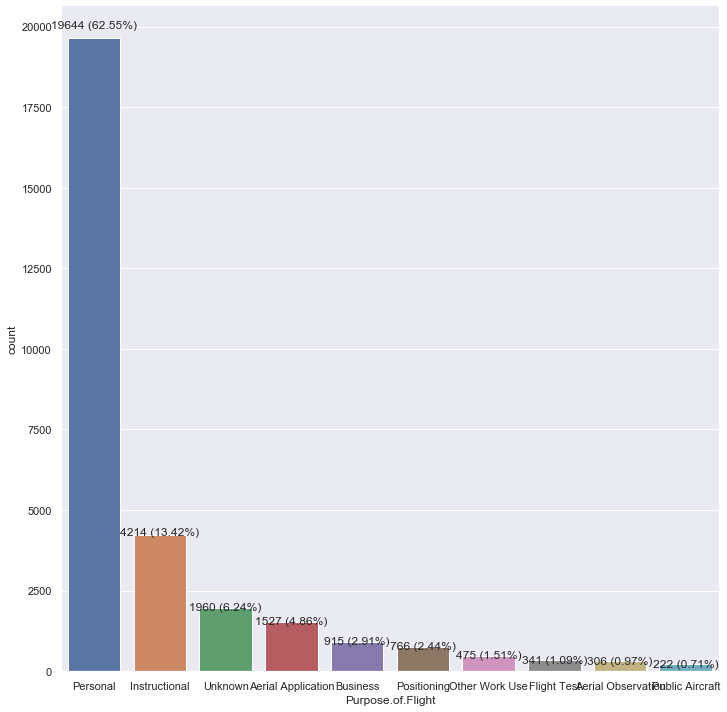

In [20]:
#Creating a control plot for Purpose.of.Flight
control_countplot("Purpose.of.Flight", PurposeList)

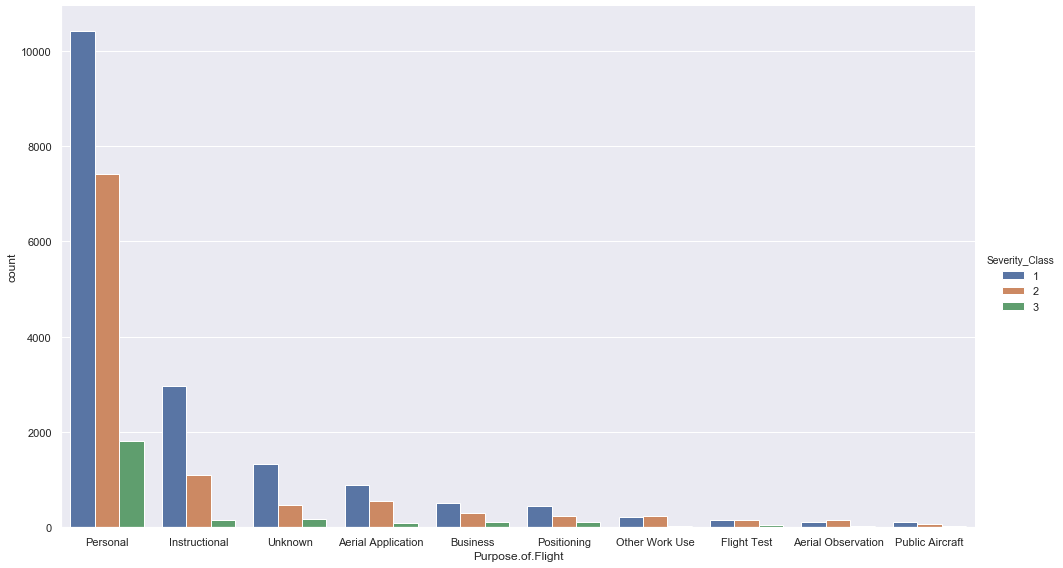

In [21]:
#Creating a countplot for Purpose.of.Flight broken down into severity class
severity_countplot("Purpose.of.Flight",PurposeList)

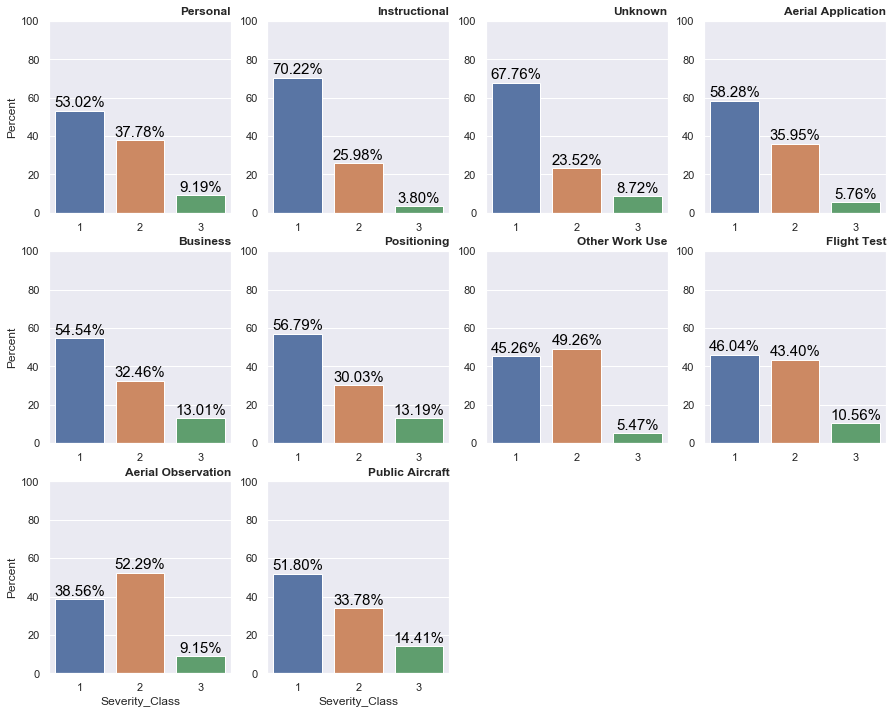

In [22]:
#Bar plot of each Severity class in percentage for each of the index in Purpose.of.Flight
f, axes = plt.subplots(3, 4, figsize=(15, 12))
for num in range (0, 10):
    df = CleanData[CleanData["Purpose.of.Flight"]==PurposeList[num]]
    ax = sb.barplot(x="Severity_Class", y="Purpose.of.Flight", data=df, orient="v", estimator=lambda x: len(x) / len(df) * 100, 
                    ax = axes[(num)//4, (num)%4])
    ax.set(ylim=(0,100))
    ax.set_title(PurposeList[num], loc = 'right', fontdict = {'fontweight':'bold'})
    autolabel_percent(ax)
    
    #Making the axes label show only on the bottom and the left sides; Decluttering the plot
    if(num%4==0):ax.set(ylabel="Percent") 
    else:ax.set(ylabel="")
    if(num//4==2):ax.set(xlabel="Severity_Class")
    else:ax.set(xlabel="")
f.delaxes(axes[2][2])
f.delaxes(axes[2][3])

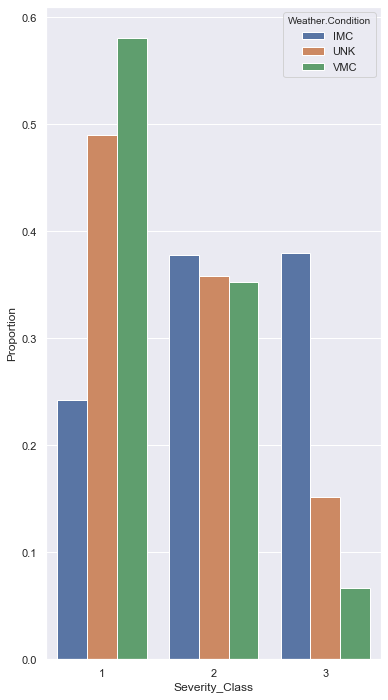

In [17]:
#Combined Plot of above percentage plots
f, axes = plt.subplots(1, 1, figsize=(6, 12))
x, y, hue = "Severity_Class", "Proportion", "Weather.Condition"
hue_order = CleanData["Weather.Condition"].value_counts().index

ax = (CleanData[x]
 .groupby(CleanData[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sb.barplot, "data"), x=x, y=y, hue=hue))

plt.legend(loc='upper right', title = "Weather.Condition")
ax.figure.savefig("Weather_Severity_Percentages3.png", dpi=300)

### <font color = #800000> From the graph, there is no significant purpose that results in a more severe accident, aerial observation and public aircraft are slightly more dangerous, meanwhile instructional purpose is the safest based on the given dataset.</font>

# <ins>Analysis 2: Aircraft Specifications</ins>

## 1. Make 

In [23]:
#Initialising MakeList with top 10 useful value in Make
MakeList = list(CleanData["Make"].value_counts().index[:10])

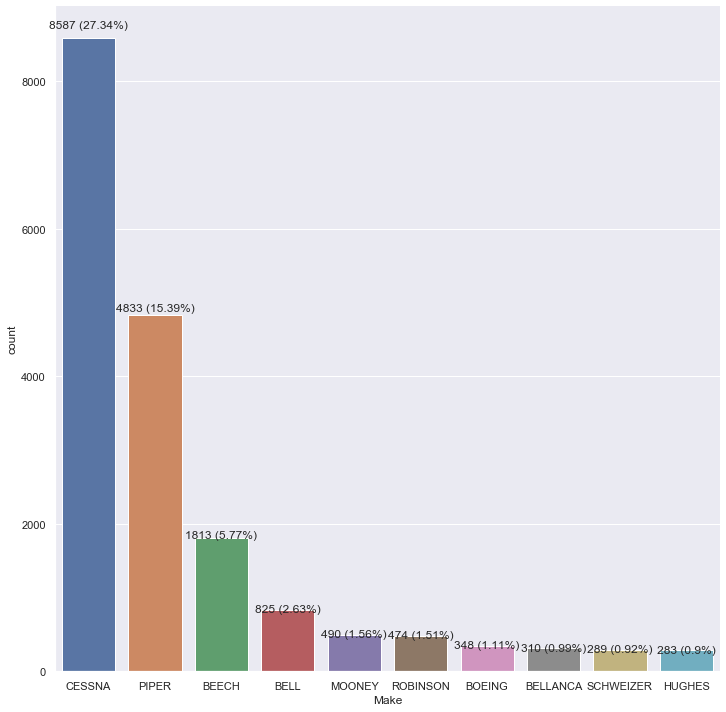

In [24]:
#Creating a control Countplot for Make
control_countplot("Make", MakeList)

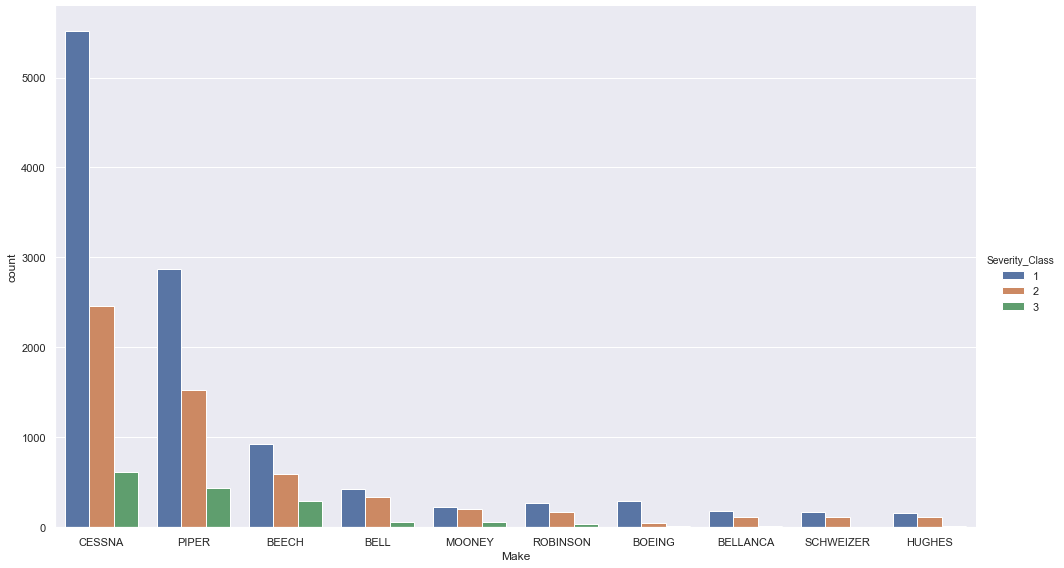

In [25]:
#Creating a countplot for Make broken down into severity class
severity_countplot("Make", MakeList)

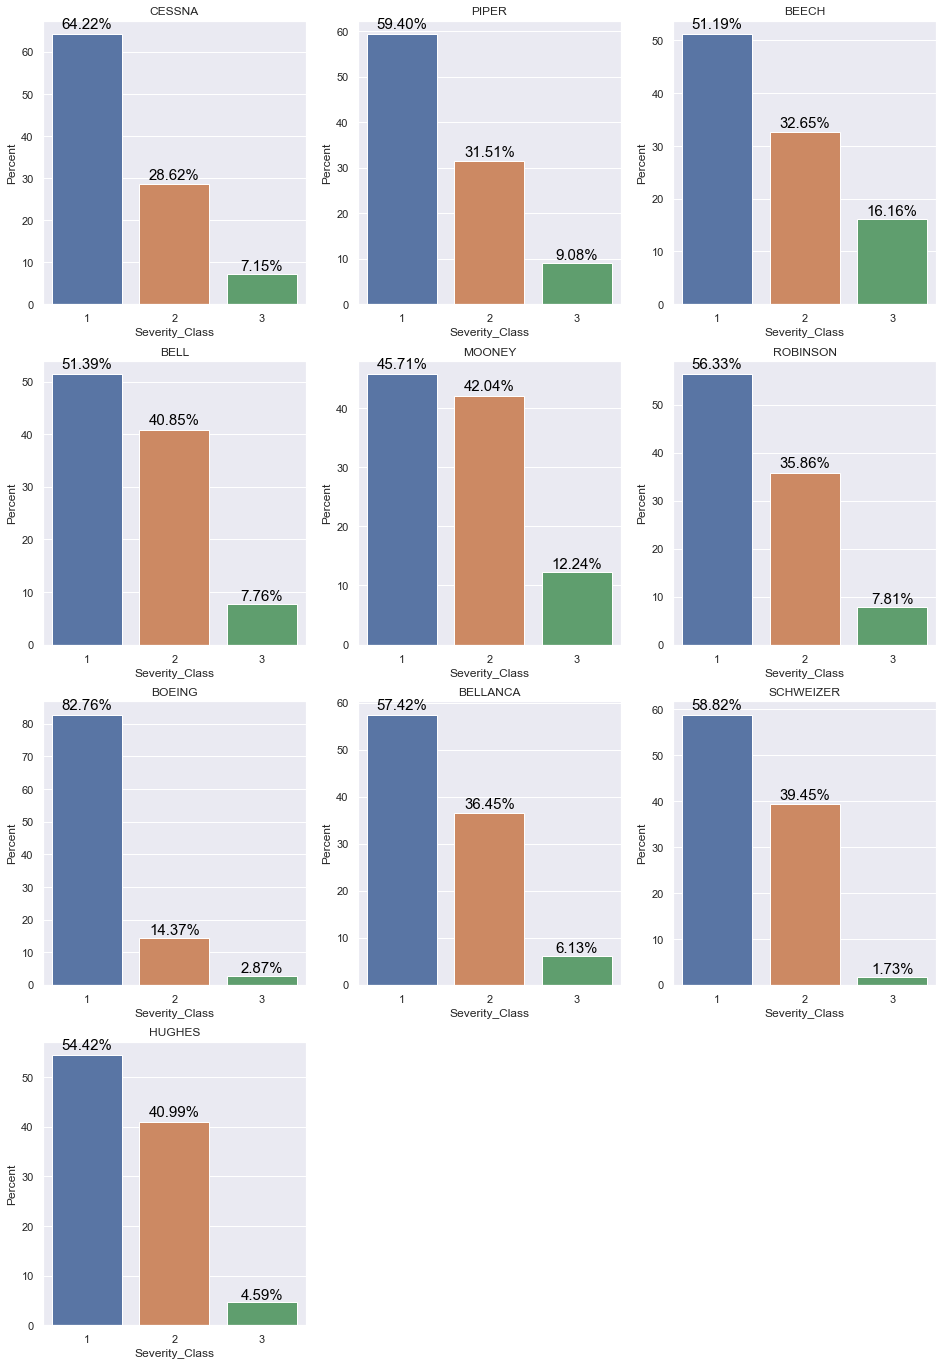

In [26]:
#Bar plot of each Severity class in percentage for each of the index in Make
f, axes = plt.subplots(4, 3, figsize=(16, 24))
for num in range (0, 10):
    df = CleanData[CleanData["Make"]==MakeList[num]]
    ax = sb.barplot(x="Severity_Class", y="Make", data=df, orient="v", estimator=lambda x: len(x) / len(df) * 100, 
                    ax = axes[num//3, num%3])
    ax.set(ylabel="Percent")
    ax.set_title(MakeList[num])
    autolabel_percent(ax)
f.delaxes(axes[3][1])
f.delaxes(axes[3][2])

### <font color = #800000> There are no signicant manufacturers that performed worse than the others. However, Boeing is doing a great job on preventing severe accidents for happening.</font>

## 2. Model

In [27]:
#Initialising ModelList with top 10 useful value in Model
ModelList = list(CleanData["Model"].value_counts().index[:10])

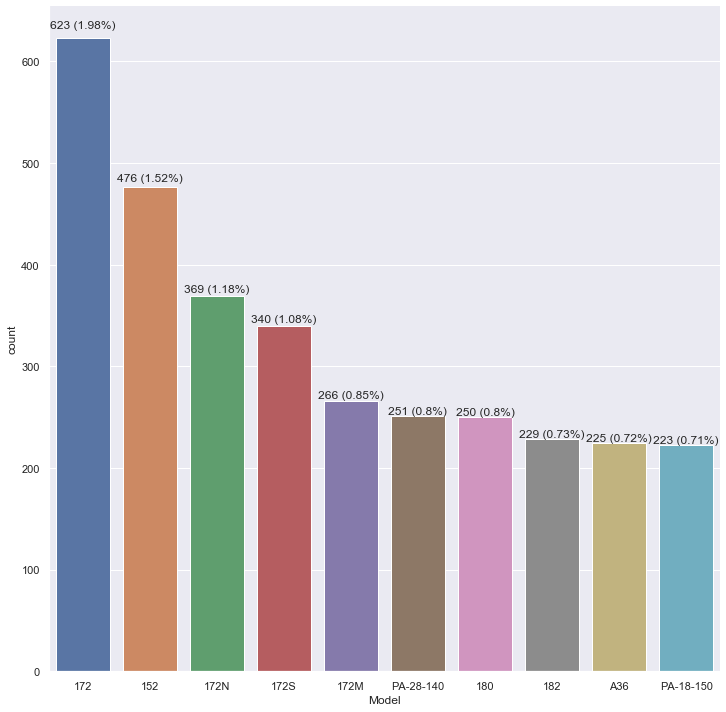

In [28]:
#Creating a control plot for Model
control_countplot("Model", ModelList)

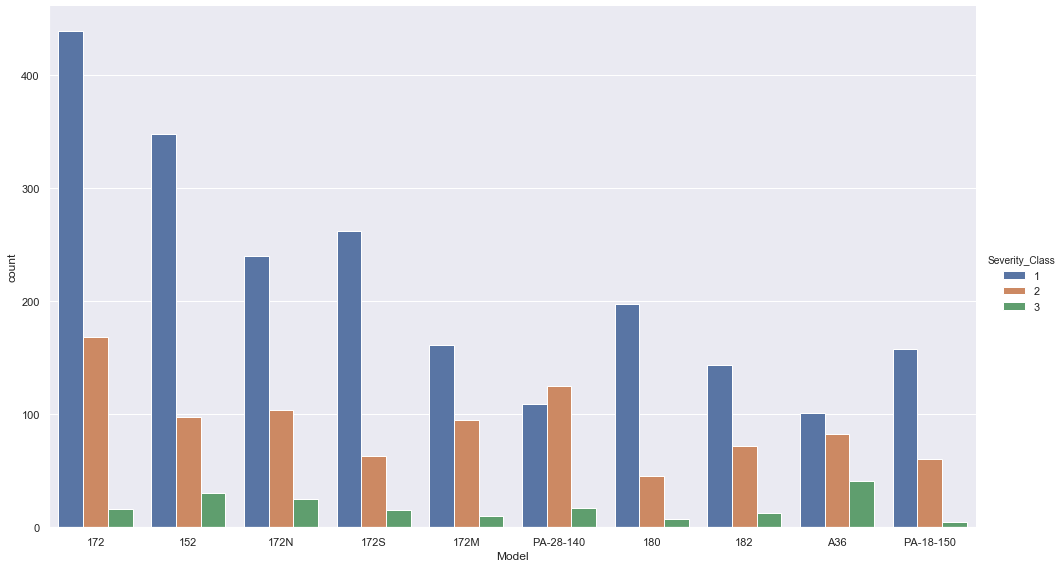

In [29]:
#Creating a countplot for Model broken down into severity class
severity_countplot("Model", ModelList)

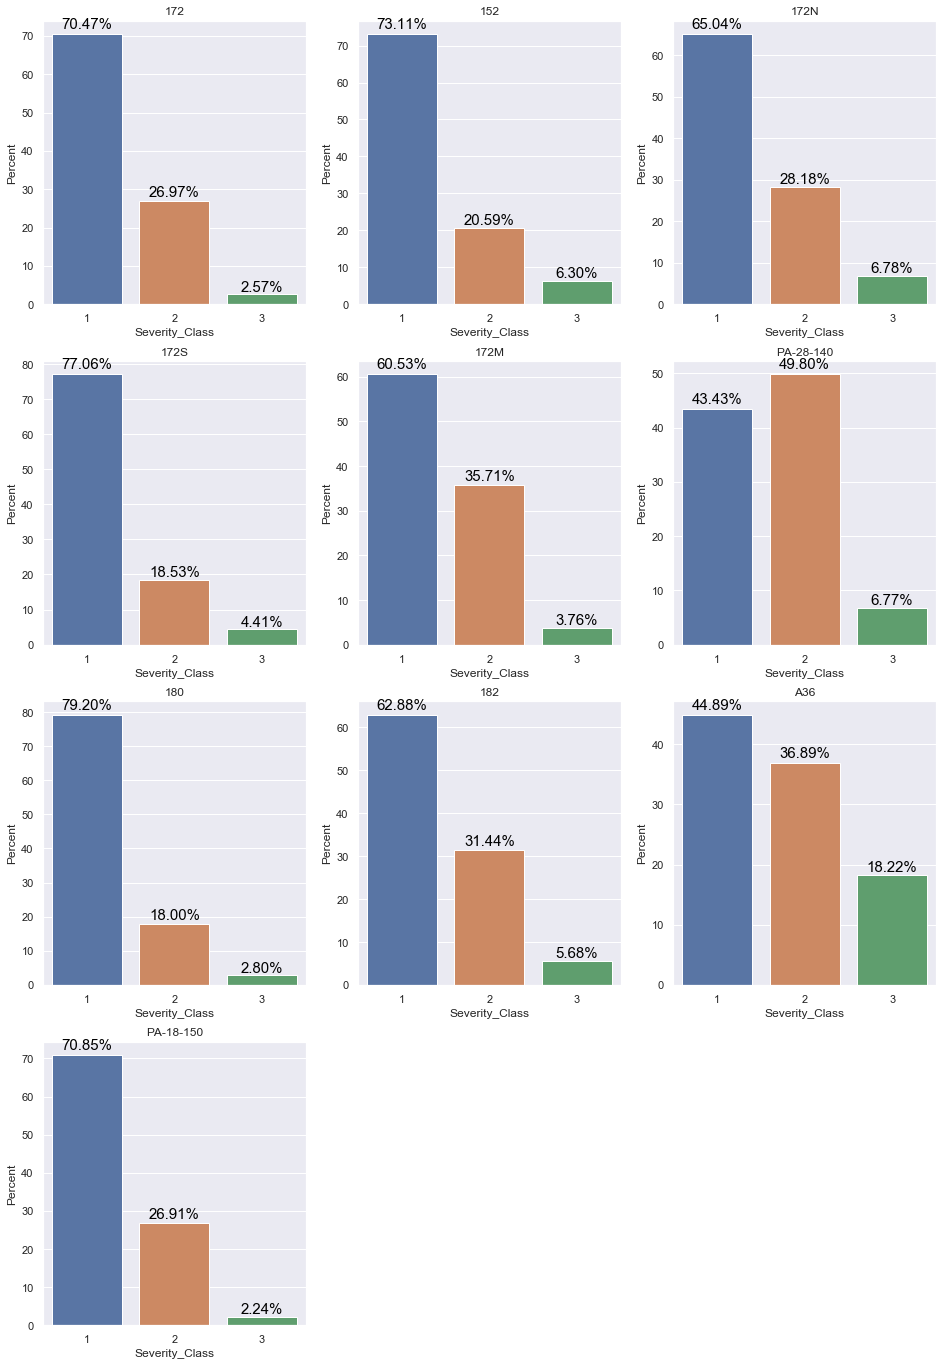

In [30]:
#Countplot of each Severity class in percentage for each of the index in Model
f, axes = plt.subplots(4, 3, figsize=(16, 24))
for num in range (0, 10):
    df = CleanData[CleanData["Model"]==ModelList[num]]
    ax = sb.barplot(x="Severity_Class", y="Model", data=df, orient="v", estimator=lambda x: len(x) / len(df) * 100, 
                    ax = axes[num//3, num%3])
    ax.set(ylabel="Percent")
    ax.set_title(ModelList[num])
    autolabel_percent(ax)
f.delaxes(axes[3][1])
f.delaxes(axes[3][2])

### <font color = #800000> Surprisingly, Piper PA-28-140 and Beech A36 are slightly higher than the others in terms of middle-to-high severity accidents. The other models are quite similar to each other.</font>

## 3. Engine Type

In [31]:
CleanData['Engine.Type'].value_counts()

Reciprocating       26237
Turbo Prop           1591
Turbo Shaft          1542
Unknown              1118
Turbo Fan             679
Turbo Jet             213
None                   12
Electric                5
REC, TJ, TJ             2
Hybrid Rocket           1
REC, TJ, REC, TJ        1
TJ, REC, REC, TJ        1
REC, ELEC               1
Name: Engine.Type, dtype: int64

In [32]:
#Initialising EngineList with top 6 useful value in Engine.Type
EngineList = list(CleanData["Engine.Type"].value_counts().index[:6])

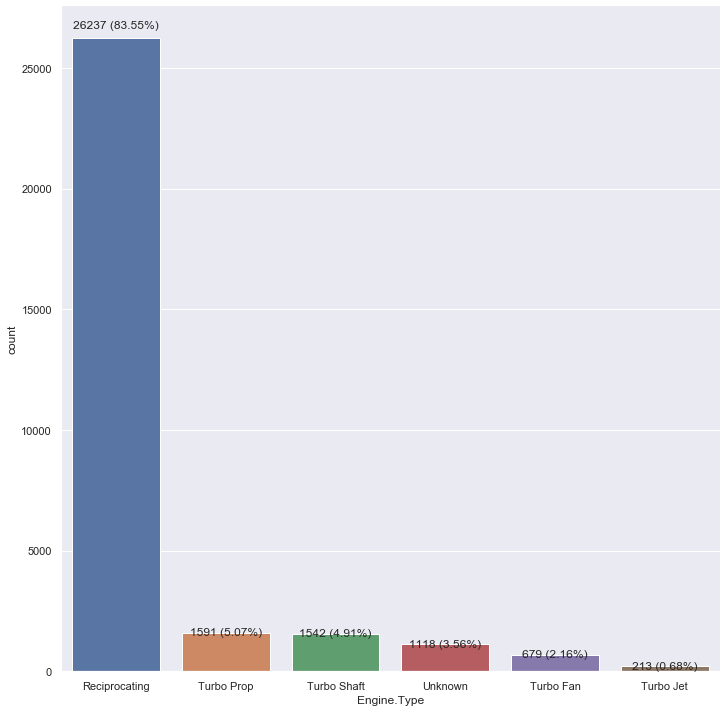

In [33]:
#Creating a control plot for Engine.Type
control_countplot("Engine.Type", EngineList)

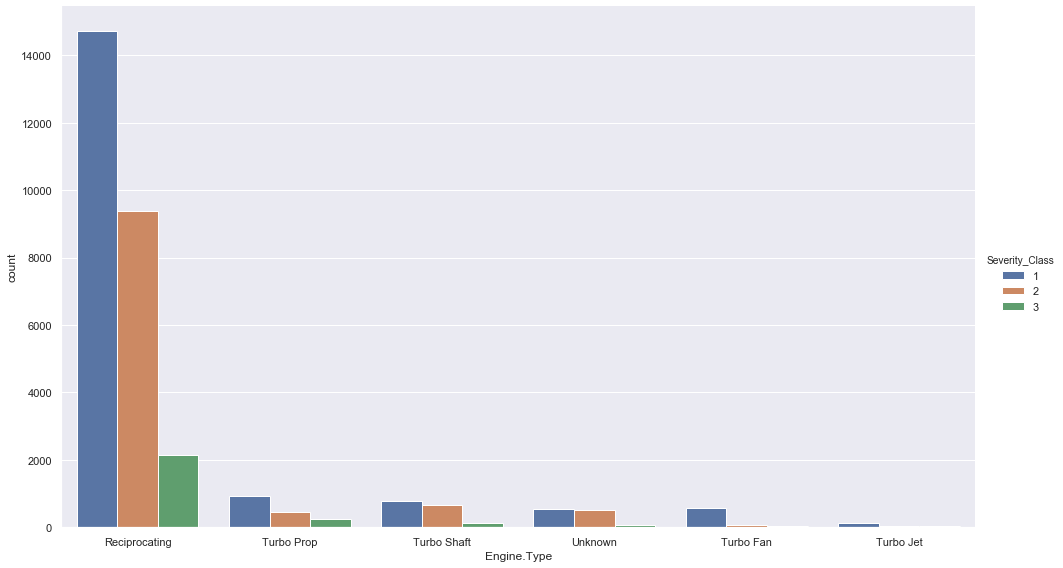

In [34]:
#Creating a countplot for Engine.Type broken down into severity class
severity_countplot("Engine.Type", EngineList)

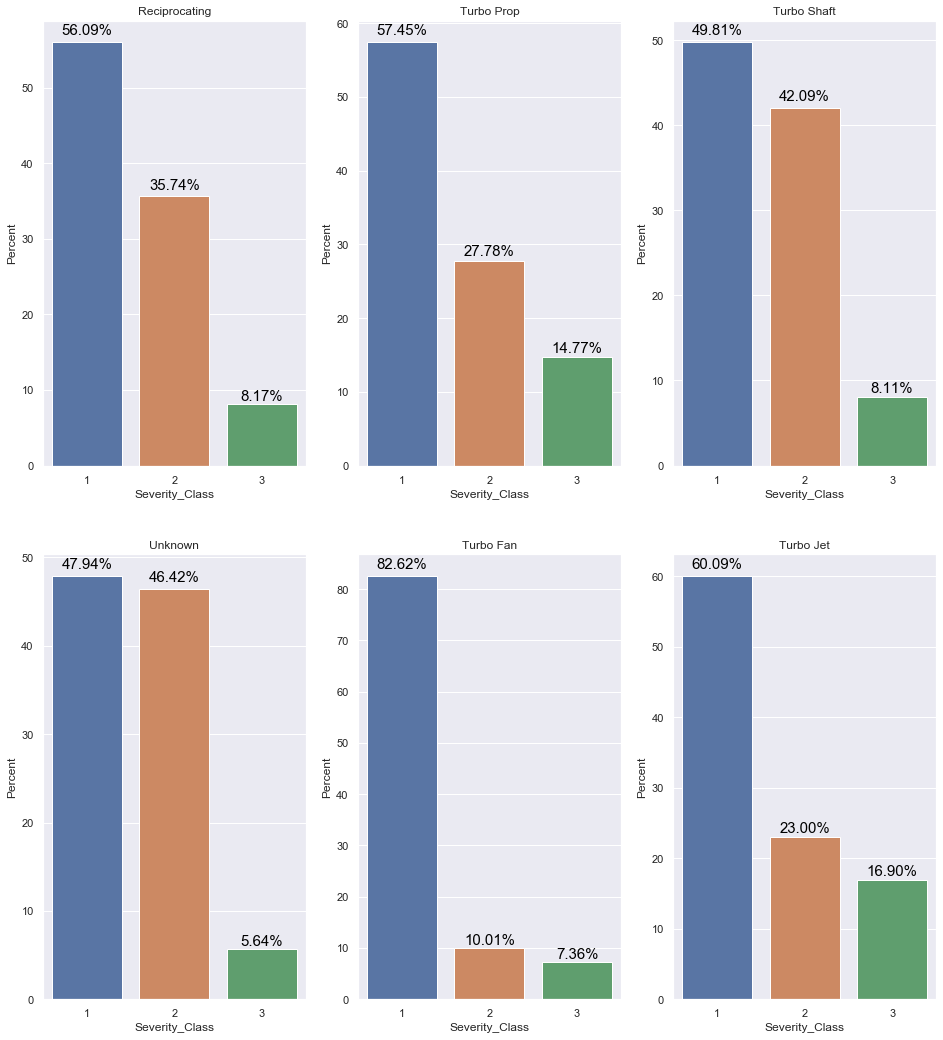

In [35]:
#Countplot of each Severity class in percentage for each of the index in Engine.Type
f, axes = plt.subplots(2, 3, figsize=(16, 18))
for num in range (0, 6):
    df = CleanData[CleanData["Engine.Type"]==EngineList[num]]
    ax = sb.barplot(x="Severity_Class", y="Engine.Type", data=df, orient="v", estimator=lambda x: len(x) / len(df) * 100, 
                    ax = axes[num//3, num%3])
    ax.set(ylabel="Percent")
    ax.set_title(EngineList[num])
    autolabel_percent(ax)

### <font color = #800000> From the graph, an accident with 'Turbo Fan' type of engine has a significantly higher chance of having a Severity of Class 1. The rest are more or less quite similar to the overall distribution of the classes.</font>

## 4. Number of Engines

In [15]:
#Initialising NumEngineList number of engines
NumEngineList = [0.0,1.0,2.0,3.0,4.0]

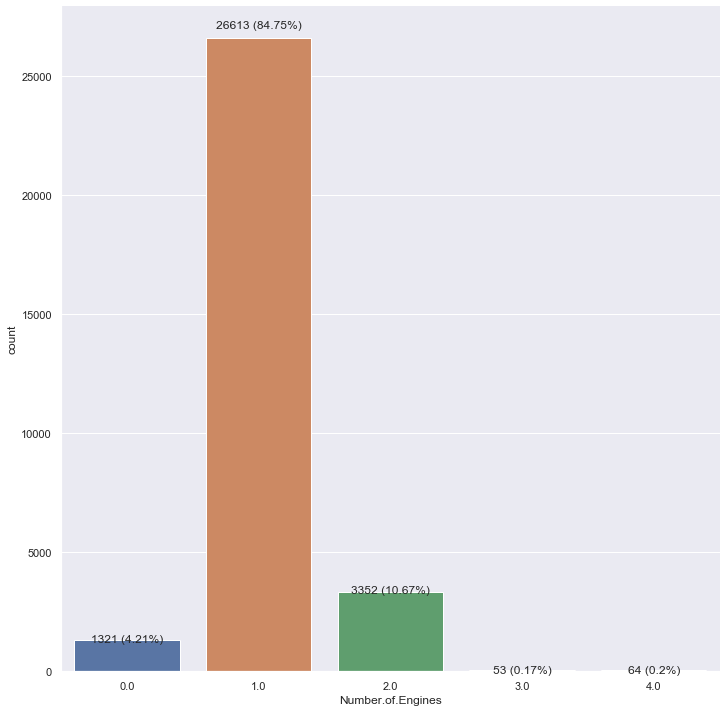

In [37]:
#Creating a control countplot for Number.of.Engines
control_countplot("Number.of.Engines", NumEngineList)

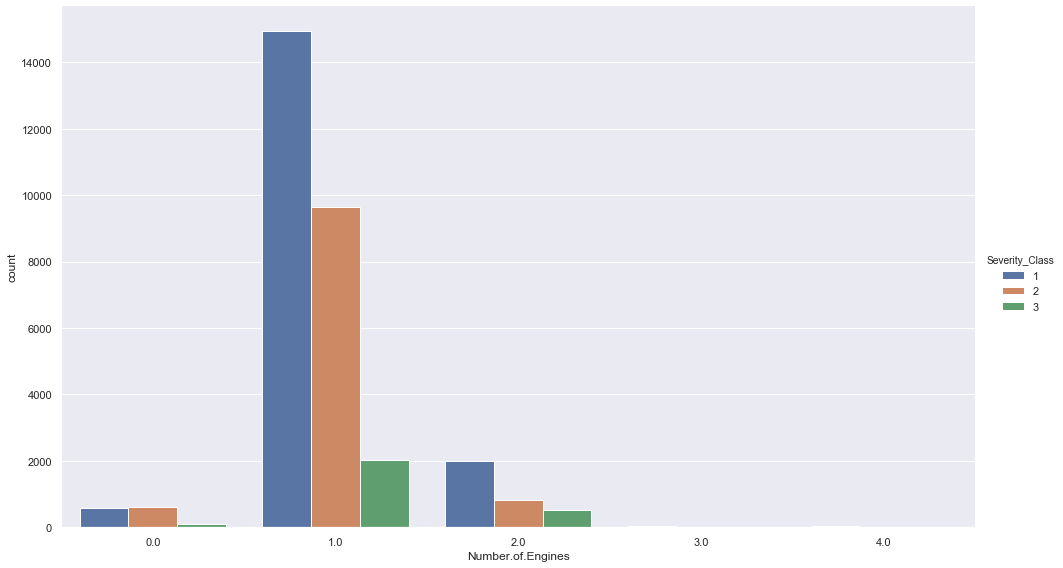

In [38]:
#Creating a countplot for Number.of.Engines broken down into severity class
severity_countplot("Number.of.Engines", NumEngineList)

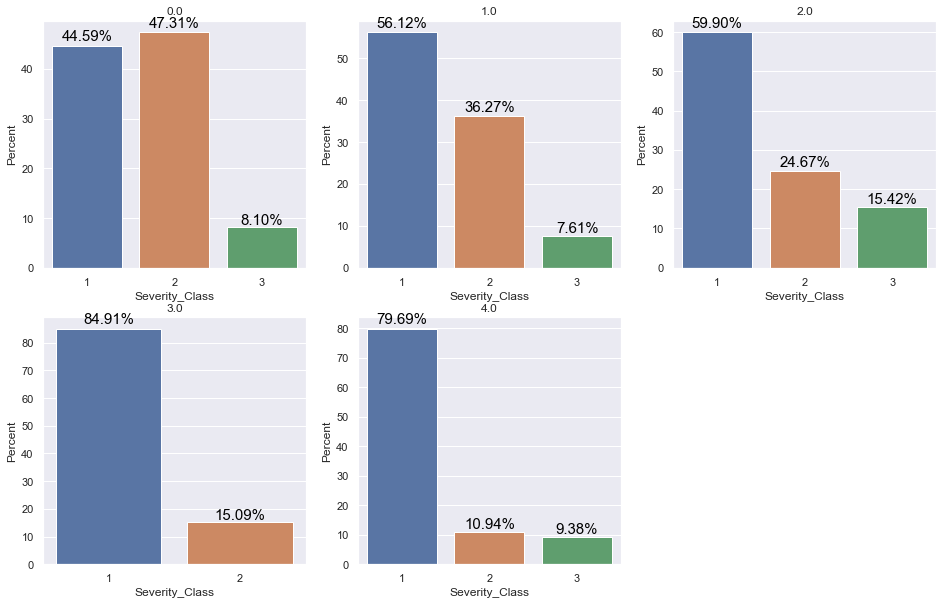

In [39]:
#Countplot of each Severity class in percentage for each of the index in Number.of.Engines
f, axes = plt.subplots(2, 3, figsize=(16, 10))
for num in range (0, 5):
    df = CleanData[CleanData["Number.of.Engines"]==NumEngineList[num]]
    ax = sb.barplot(x="Severity_Class", y="Number.of.Engines", data=df, orient="v", estimator=lambda x: len(x) / len(df) * 100, 
                    ax = axes[num//3, num%3])
    ax.set(ylabel="Percent")
    ax.set_title(NumEngineList[num])
    autolabel_percent(ax)
f.delaxes(axes[1][2])

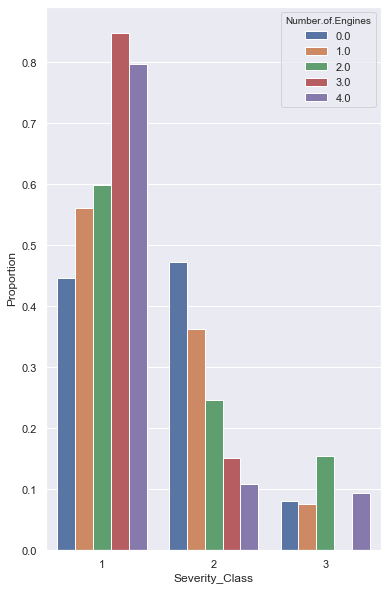

In [16]:
#Combined Plot of the percentage plots above
f, axes = plt.subplots(1, 1, figsize=(6, 10))
x, y, hue = "Severity_Class", "Proportion", "Number.of.Engines"
hue_order = NumEngineList

ax = (CleanData[x]
 .groupby(CleanData[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sb.barplot, "data"), x=x, y=y, hue=hue))

plt.legend(loc='upper right', title = "Number.of.Engines")
ax.figure.savefig("NumEngine_Severity2.png", dpi=300)

### <font color = #800000> Following our hypothesis, more engines does make a different in terms of severity. From the graph, as the number of engines increase, the percentage of lower severity class accidents increase. Hence it can be seen that the chance that an accident is less severe is higher as the number of engines increases.</font>

## 5. Amateur Built

In [40]:
#Creating a list and initialising it with every index in Amateur.Built
AmateurList = list(CleanData["Amateur.Built"].value_counts().index)

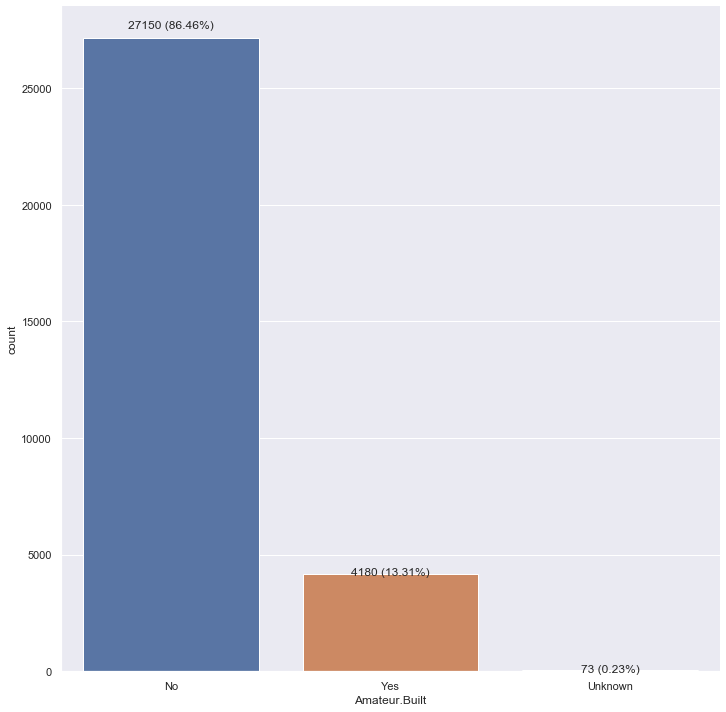

In [41]:
#Creating a control plot for Amateur.Built
control_countplot("Amateur.Built", AmateurList)

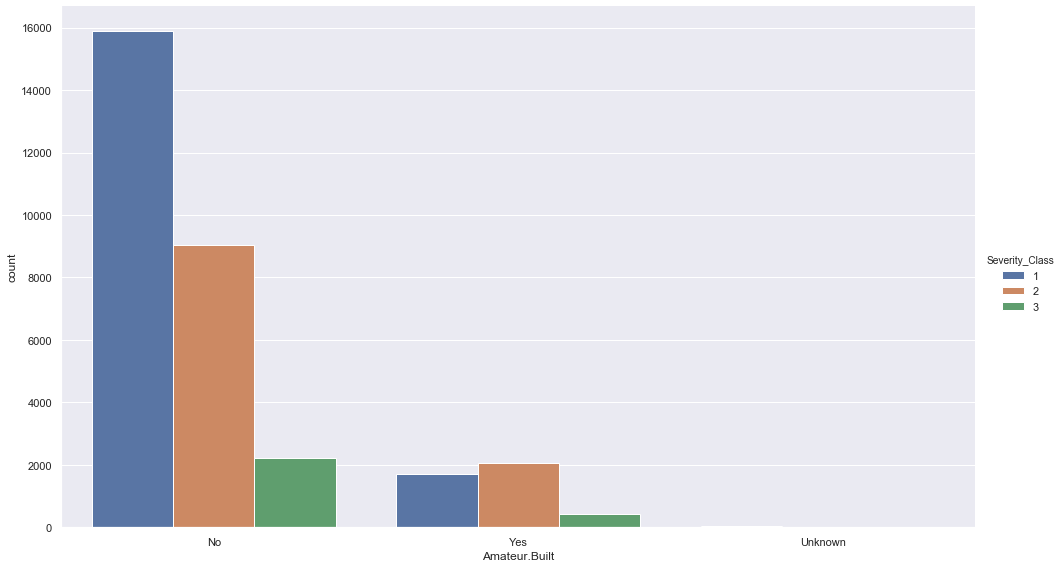

In [42]:
#Creating a countplot for Amateur.Built broken down into severity class
severity_countplot("Amateur.Built", AmateurList)

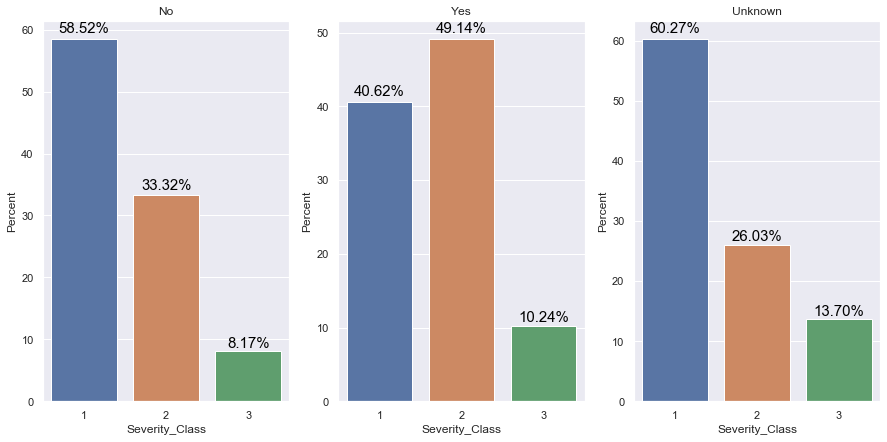

In [43]:
#Countplot of each Severity class in percentage for each of the index in Amateur.Built
f, axes = plt.subplots(1, 3, figsize=(15, 7))
for num in range (0, 3):
    df = CleanData[CleanData["Amateur.Built"]==AmateurList[num]]
    ax = sb.barplot(x="Severity_Class", y="Amateur.Built", data=df, orient="v", estimator=lambda x: len(x) / len(df) * 100, 
                    ax = axes[num])
    ax.set(ylabel="Percent")
    ax.set_title(AmateurList[num])
    autolabel_percent(ax)

### <font color = #800000> From the graph, a significant difference can be seen between an amateur and profesionally-built aircraft. An accident by an amateur-built is more likely to be more severe compared to a profesionally-built one.</font>

## 6. Aircraft Category

In [44]:
CleanData['Aircraft.Category'].value_counts()

Airplane             17402
Unknown              11143
Helicopter            2050
Glider                 393
Weight-Shift            99
Balloon                 93
Gyrocraft               73
Gyroplane               59
Powered Parachute       59
Ultralight              25
Blimp                    4
Powered-Lift             2
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [45]:
#Initialising PurposeList with top 4 useful value in Aircraft.Category
AircraftList = list(CleanData["Aircraft.Category"].value_counts().index[:4])

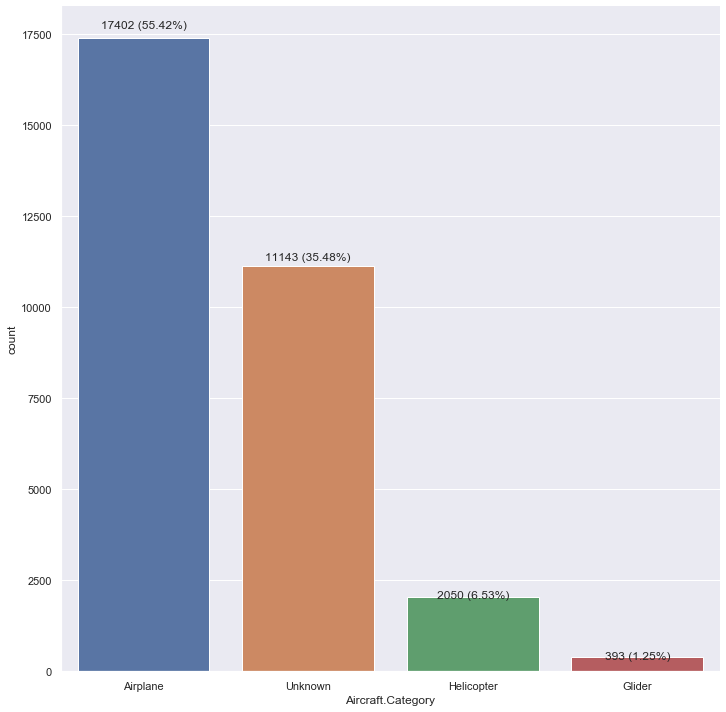

In [46]:
#Creating a control countplot for Aircraft.Category
control_countplot("Aircraft.Category", AircraftList)

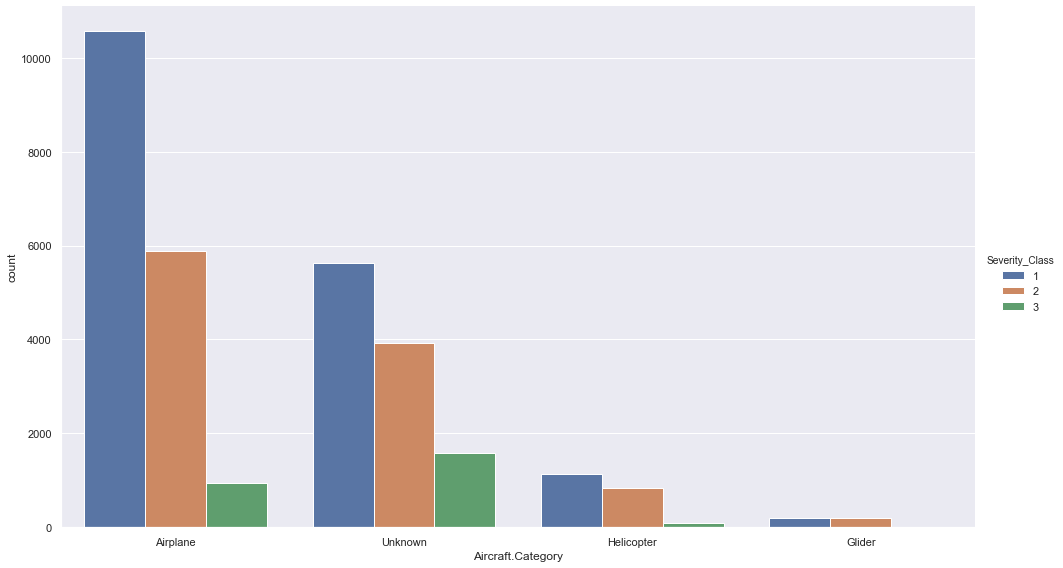

In [47]:
#Creating a countplot for Aircraft.Category broken down into severity class
severity_countplot("Aircraft.Category", AircraftList)

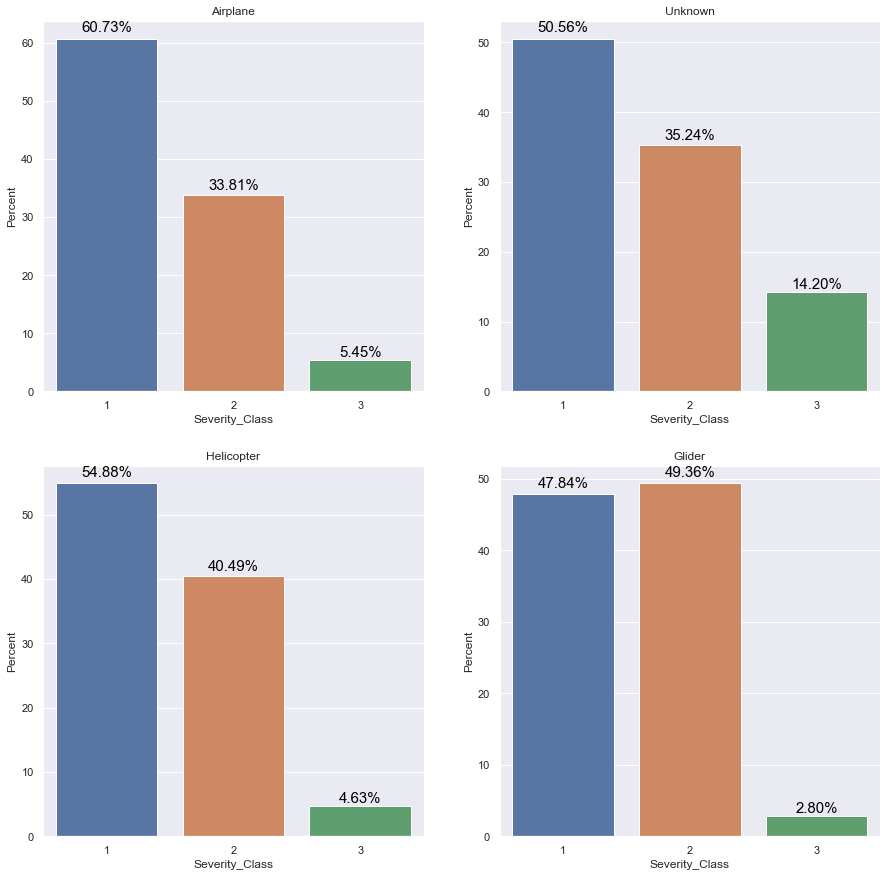

In [48]:
#Countplot of each Severity class in percentage for each of the index in Aircraft.Category
f, axes = plt.subplots(2, 2, figsize=(15, 15))
for num in range (0, 4):
    df = CleanData[CleanData["Aircraft.Category"]==AircraftList[num]]
    ax = sb.barplot(x="Severity_Class", y="Aircraft.Category", data=df, orient="v", estimator=lambda x: len(x) / len(df) * 100, 
                    ax = axes[num//2,num%2])
    ax.set(ylabel="Percent")
    ax.set_title(AircraftList[num])
    autolabel_percent(ax)

### <font color = #800000> Although there is some variation in the distribution of severity levels between different aircraft categories, it is of no meaningful use as significant portion (35.48%) of the dataset's category is labelled as "Unknown". </font>

# <ins>Analysis 3: Time Series Analysis</ins>

# 1. Year

In [49]:
#Initialising YearList with years between 2000 to 2020
YearList = list(range(2000,2020))

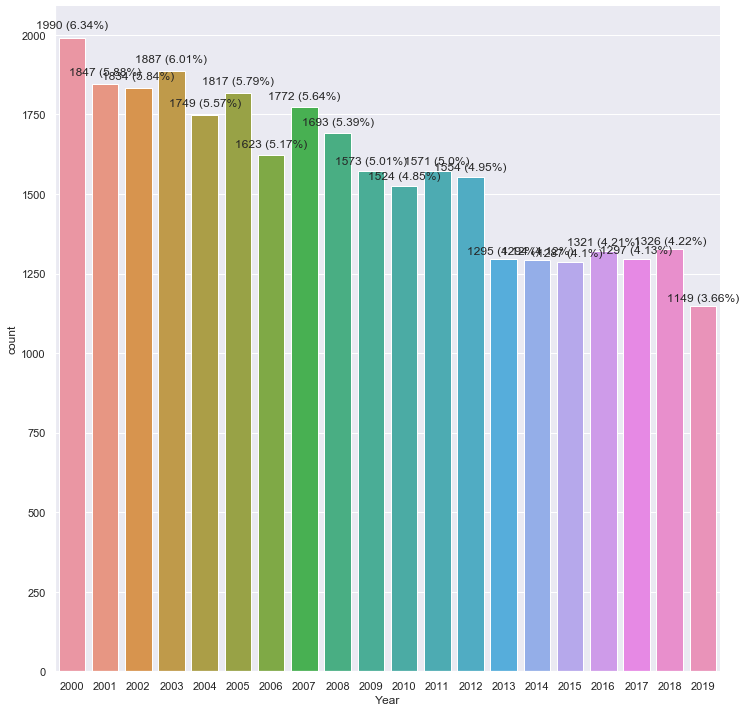

In [50]:
#Creating a control countplot for Year
control_countplot('Year', YearList)

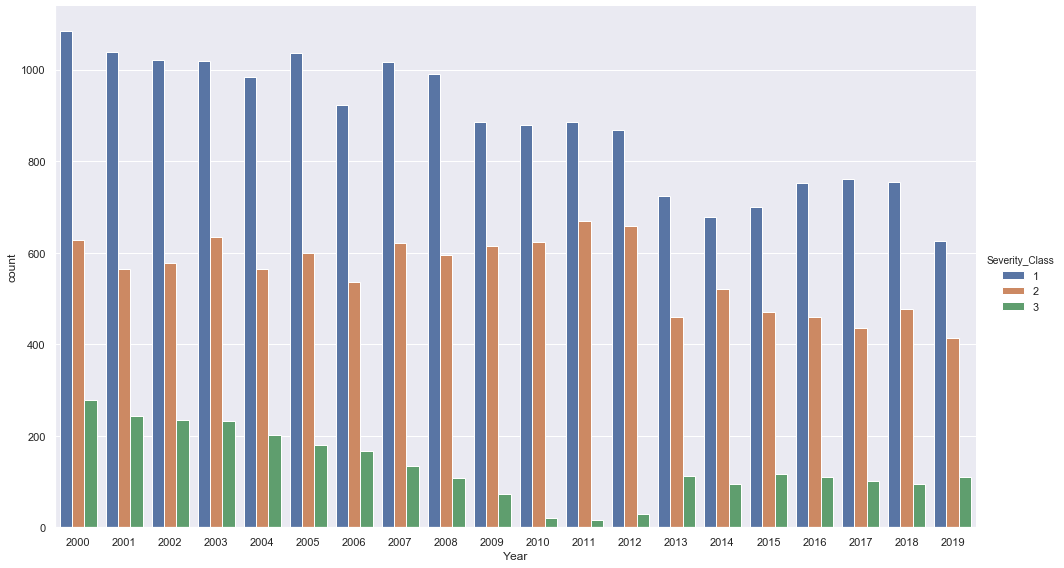

In [51]:
#Creating a countplot for Year broken down into severity class
severity_countplot ("Year", YearList)

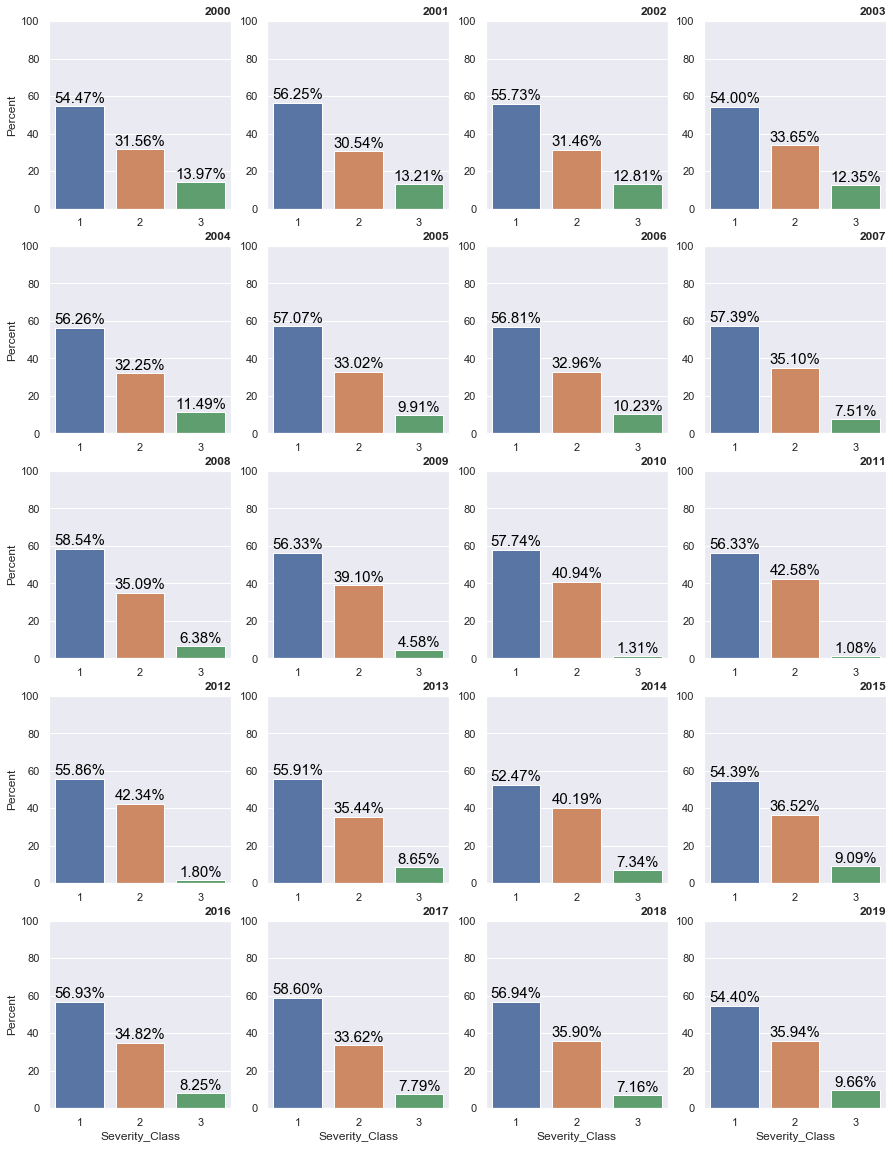

In [52]:
#Bar plot of each Severity class in percentage for each Year
f, axes = plt.subplots(5, 4, figsize=(15, 20))
for num in range (0, 20):
    df = CleanData[CleanData["Year"]==YearList[num]]
    ax = sb.barplot(x="Severity_Class", y="Year", data=df, orient="v", estimator=lambda x: len(x) / len(df) * 100, 
                    ax = axes[(num)//4, (num)%4])
    ax.set(ylim=(0,100))
    ax.set_title(YearList[num], loc = 'right', fontdict = {'fontweight':'bold'})
    autolabel_percent(ax)
    
    #Making the axes label show only on the bottom and the left sides; Decluttering the plot
    if(num%4==0):ax.set(ylabel="Percent") 
    else:ax.set(ylabel="")
    if(num//4==4):ax.set(xlabel="Severity_Class")
    else:ax.set(xlabel="")

### <font color = #800000> We first thought that the chance of having a severe accident will decrease as the year increases. However, the graphs do not reflect any significant difference in terms of severity of an accident happened in a particular year. On the bright side, the number of occuring accidents decreases as year increases.</font>

## 2. Month

In [12]:
#Initialising MonthList with every month and sorted according to month
MonthList = list(CleanData['Month'].unique())
MonthList.sort()
MonthList

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

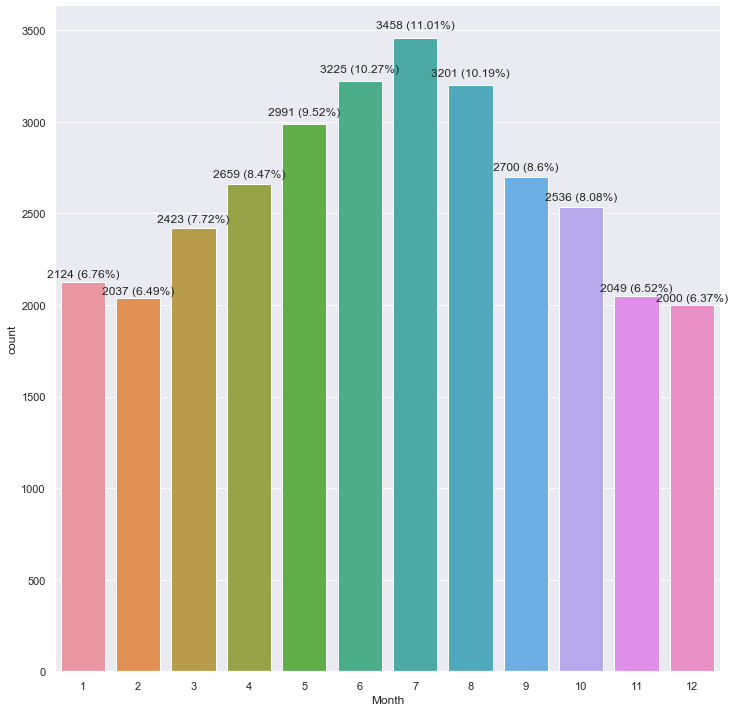

In [54]:
#Creating a control countplot for Month
control_countplot('Month', MonthList)

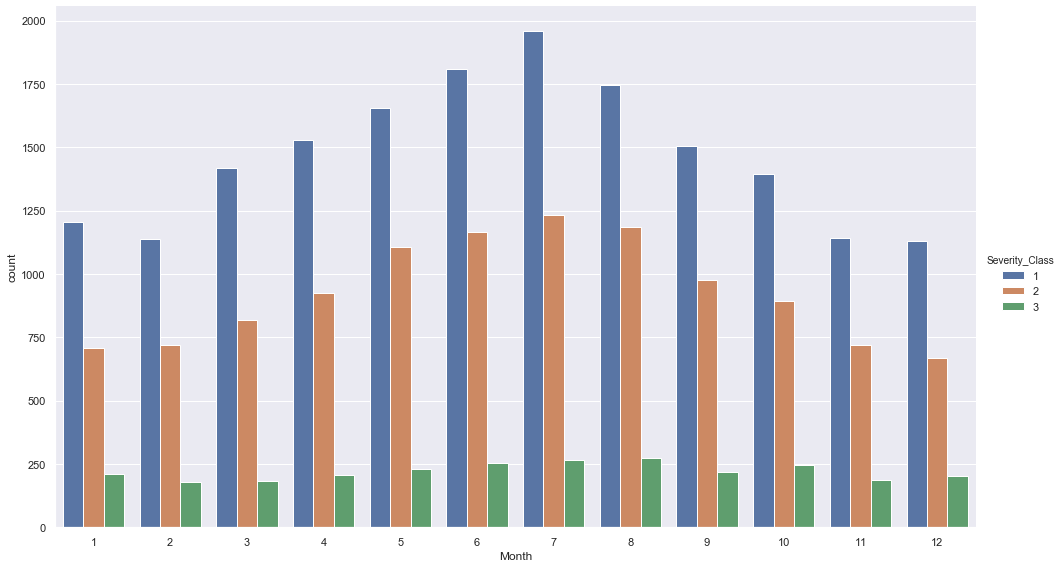

In [55]:
#Creating a countplot for Month broken down into severity class
severity_countplot ("Month", MonthList)

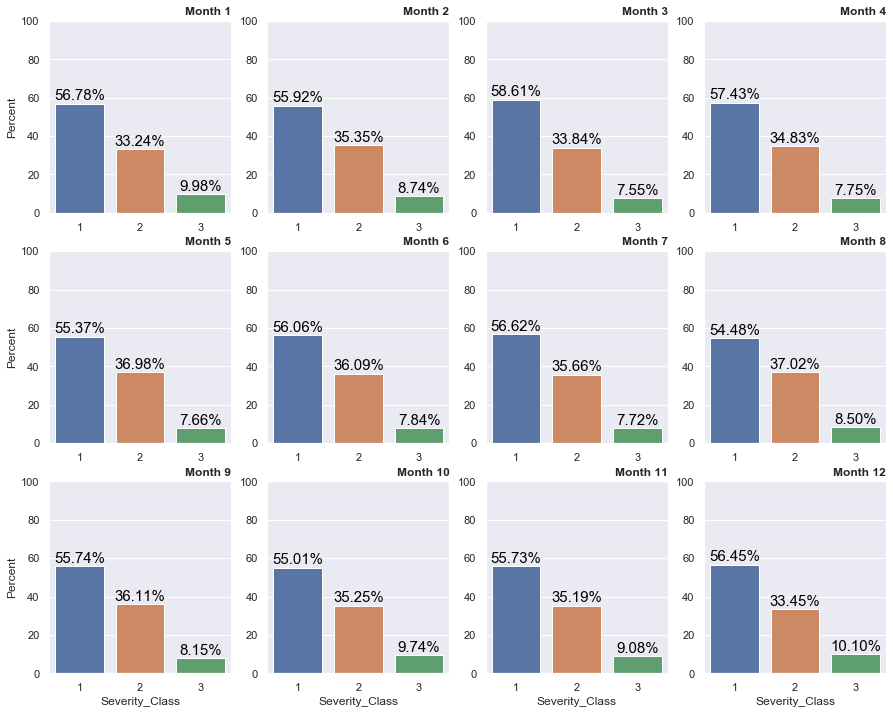

In [56]:
#Bar plot of each Severity class in percentage for each of the Months
f, axes = plt.subplots(3, 4, figsize=(15, 12))
for num in range (0, 12):
    df = CleanData[CleanData["Month"]==MonthList[num]]
    ax = sb.barplot(x="Severity_Class", y="Month", data=df, orient="v", estimator=lambda x: len(x) / len(df) * 100, 
                    ax = axes[(num)//4, (num)%4])
    ax.set(ylim=(0,100))
    ax.set_title("Month " + str(MonthList[num]), loc = 'right', fontdict = {'fontweight':'bold'})
    autolabel_percent(ax)
    
    #Making the axes label show only on the bottom and the left sides; Decluttering the plot
    if(num%4==0):ax.set(ylabel="Percent") 
    else:ax.set(ylabel="")
    if(num//4==2):ax.set(xlabel="Severity_Class")
    else:ax.set(xlabel="")

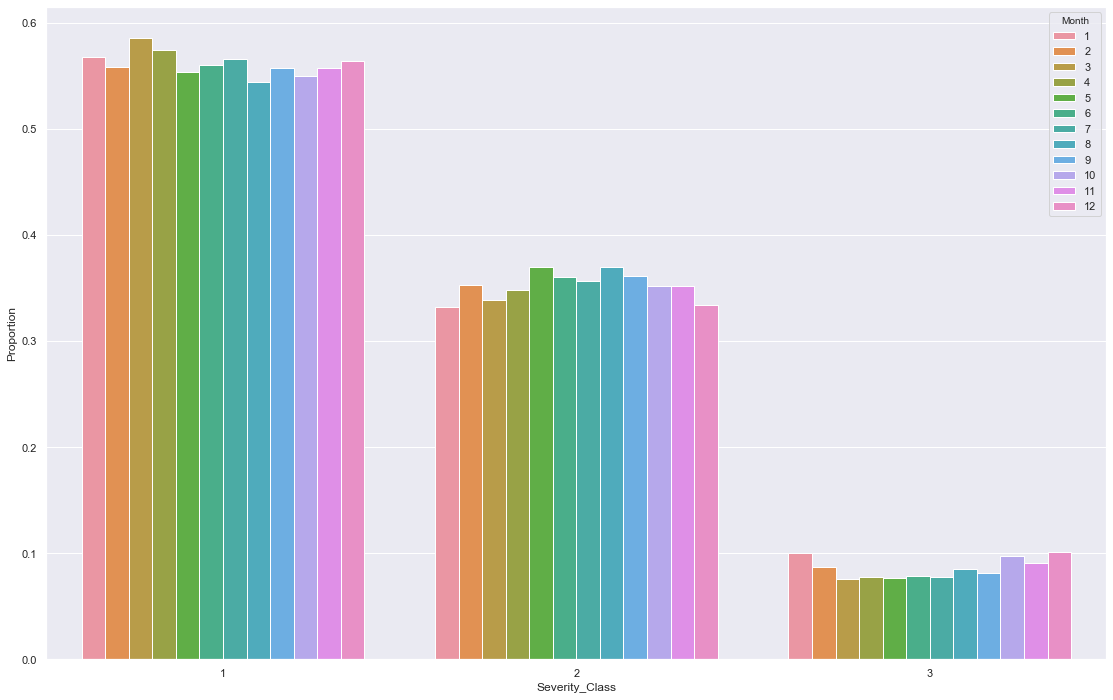

In [13]:
#Combined plot of the above plots
f, axes = plt.subplots(1, 1, figsize=(19, 12))
x, y, hue = "Severity_Class", "Proportion", "Month"
hue_order = MonthList

ax = (CleanData[x]
 .groupby(CleanData[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sb.barplot, "data"), x=x, y=y, hue=hue))

plt.legend(loc='upper right', title = "Month")
ax.figure.savefig("Month_Severity.png", dpi = 300)

### <font color = #800000> Surprisingly, the graph shows a significant number of accidents occuring in the middle of the year. However, there might be some external factors, such as more flights that we may not infer due to a lack of safe flights. Taking a closer look at the spread of accidents in months among severity classes, we also observe a slight dip in the middle months for Severity Class 3, which could be due to less IMC-like weather conditions during the US summertime. </font>

# <ins>Analysis 4: Location</ins>

In [57]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
import descartes
import seaborn as sb
%matplotlib inline

In [58]:
# reading the shapefile
usa = gpd.read_file("./states_21basic/states.shp")
usa.head()

STATE_NAME  DRAWSEQ STATE_FIPS          SUB_REGION STATE_ABBR  \
0        Hawaii        1         15             Pacific         HI   
1    Washington        2         53             Pacific         WA   
2       Montana        3         30            Mountain         MT   
3         Maine        4         23         New England         ME   
4  North Dakota        5         38  West North Central         ND   

                                            geometry  
0  MULTIPOLYGON (((-160.07380 22.00418, -160.0497...  
1  MULTIPOLYGON (((-122.40202 48.22522, -122.4628...  
2  POLYGON ((-111.47543 44.70216, -111.48080 44.6...  
3  MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...  
4  POLYGON ((-98.73044 45.93827, -99.00683 45.939...

In [59]:
# retrieve the aviation accident data
aviationdata = pd.read_csv("./cleandata.csv")

In [60]:
# some of the data have a longitude error due to two different formats a longitude value may have
aviationdata['Longitude'] = -(aviationdata['Longitude'].abs())

# after some research on the airport locations, it has been found out that some longitude/latitude values are mistyped in the data
aviationdata = aviationdata[aviationdata['Longitude']<-61]
aviationdata = aviationdata[aviationdata['Latitude']>18]

# These two lines are to remove the data with the airport codes on the list (idk if we shd include the codes since it doesn't make any differences)

In [61]:
# using GeoDataFrame to put the latitude and longitude into the plotting format
gdf = gpd.GeoDataFrame(aviationdata, geometry=gpd.points_from_xy(aviationdata.Longitude, aviationdata.Latitude))
gdf.head(50)

Unnamed: 0  Event.Date        Country   Latitude   Longitude Airport.Code  \
0            0  31/12/2019  United States  39.128611 -123.715833          LLR   
1            1  31/12/2019  United States  38.846111  -94.736111          OJC   
2            2  31/12/2019  United States  64.666945 -148.133334          XXX   
3            3  30/12/2019  United States  32.365556  -97.645000          XXX   
4            5  28/12/2019  United States  30.176111  -92.007500          LFT   
5            6  25/12/2019  United States  31.364167  -85.312500          0J6   
6            9  22/12/2019  United States  34.440000 -114.345555          XXX   
7           10  21/12/2019  United States  38.095833  -87.540555          EVV   
9           12  19/12/2019  United States  28.367500  -97.796389          BEA   
10          13  18/12/2019  United States  43.643889 -116.636944          EUL   
11          14  18/12/2019  United States  39.259167  -84.774445          I67   
13          20  14/12/2019  United States  32.316945 -106.774723          XXX   
14          21  12/12/2019  United States  33.146389 -117.333611         KCRQ   
15          22  11/12/2019  United States  33.683611 -112.110278          DVT   
16          23   9/12/2019  United States  28.852500  -96.918611          XXX   
17          24   8/12/2019  United States  36.984166  -91.955556          1H5   
18          25   8/12/2019  United States  34.479445 -111.989166          XXX   
19          26   7/12/2019  United States  41.194722  -96.112500          MLE   
20          27   7/12/2019  United States  28.919167  -89.653333          XXX   
22          30   4/12/2019  United States  38.836111  -95.181945          K64   
23          31   3/12/2019  United States  39.878611 -111.857222          U14   
24          32   3/12/2019  United States  34.646111  -89.305278          XXX   
25          33   3/12/2019  United States  42.409444  -83.010278          DET   
26          34   2/12/2019  United States  27.645833  -80.427778          VRB   
27          35   1/12/2019  United States  36.380000  -88.990000          UCY   
28          36   1/12/2019  United States  29.550833  -98.499722          SAT   
29          37  30/11/2019  United States  32.766667  -82.810000          XXX   
30          38  30/11/2019  United States  43.765556  -99.337222          9V9   
31          40  29/11/2019  United States  60.504167 -150.151389          XXX   
32          42  26/11/2019  United States  36.400000 -115.180834          VGT   
33          45  25/11/2019  United States  33.685277 -115.267223          XXX   
34          46  24/11/2019  United States  30.637500  -86.993611          2R4   
35          47  23/11/2019  United States  41.916111  -72.776945          4B9   
36          48  23/11/2019  United States  38.069723 -102.688611          LAA   
37          49  23/11/2019  United States  27.260556  -80.847500          OBE   
38          50  23/11/2019  United States  45.440277  -93.970556          8Y6   
39          51  22/11/2019  United States  41.967778 -114.646111          KPT   
40          52  22/11/2019  United States  32.489722  -95.481945          XXX   
41          53  20/11/2019  United States  29.900000  -97.852500         KHYI   
42          54  19/11/2019  United States  39.852222  -76.486389          9W8   
43          55  18/11/2019  United States  38.980556  -76.922223          CGS   
44          56  17/11/2019  United States  41.184444 -112.015000          OGD   
45          59  17/11/2019  United States  41.178334  -78.898611          DUJ   
46          61  17/11/2019  United States  27.067223  -82.440277          VNC   
47          62  16/11/2019  United States  37.696111 -121.819723          LVK   
48          63  16/11/2019  United States  40.478889 -111.433889          HCR   
49          64  16/11/2019  United States  33.714167  -96.674445          GYI   
50          65  16/11/2019  United States  44.521111  -68.641111          XXX   
51          67  15/11/2019  United 

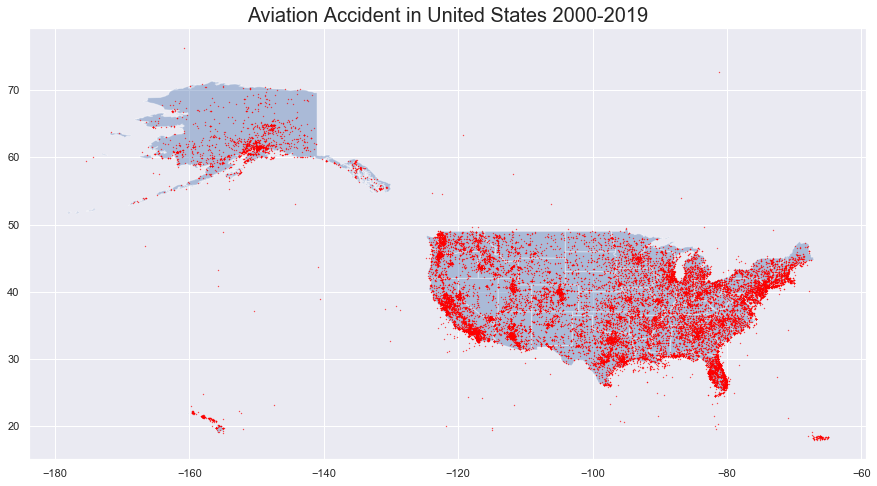

In [62]:
#plotting the map and the data points altogether
fig,ax = plt.subplots(figsize=(15,15))
usa.plot(ax = ax, alpha = 0.4)
gdf.plot(ax=ax, markersize=0.1, color='red')
ax.set_title("Aviation Accident in United States 2000-2019", fontsize = 20)
plt.show()

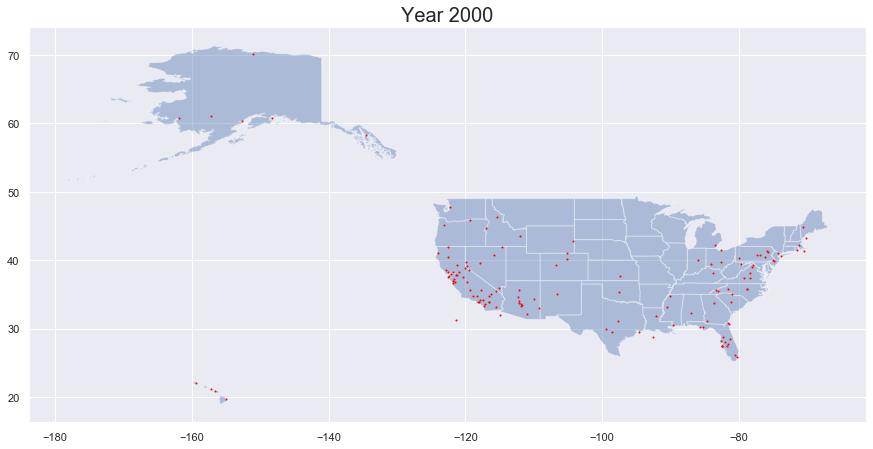

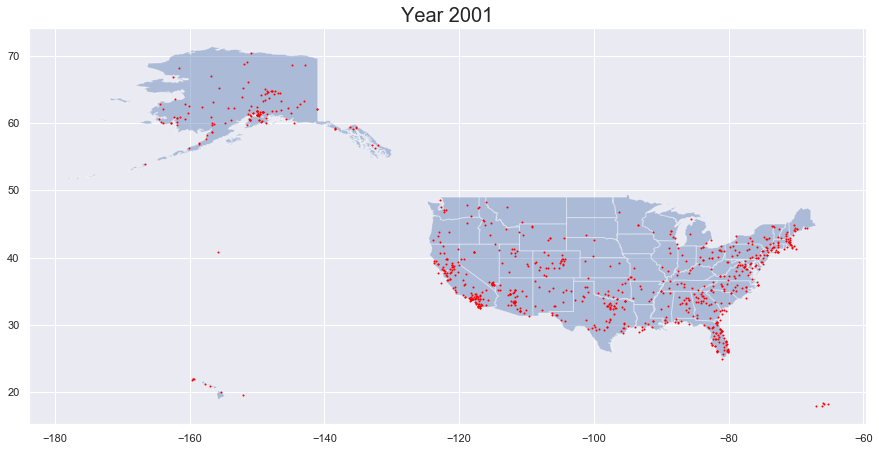

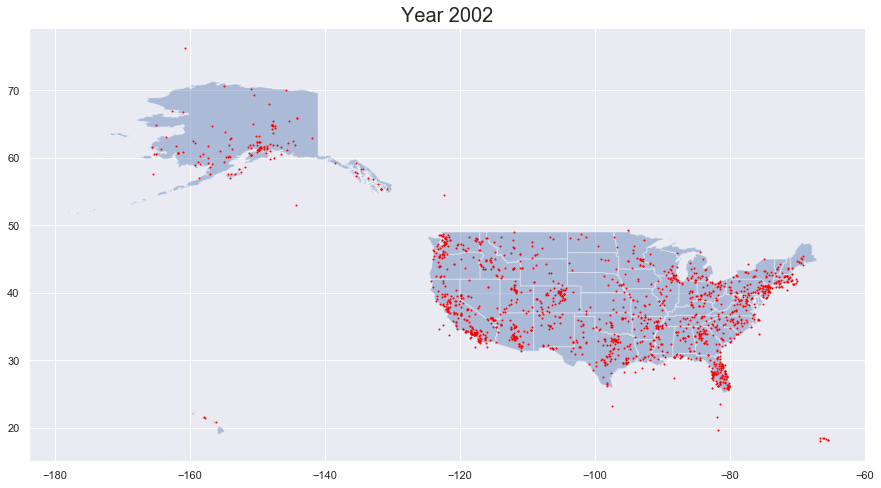

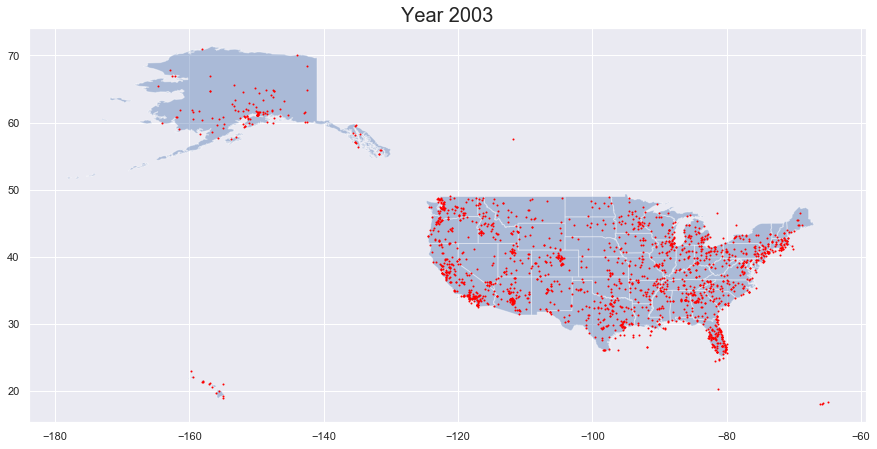

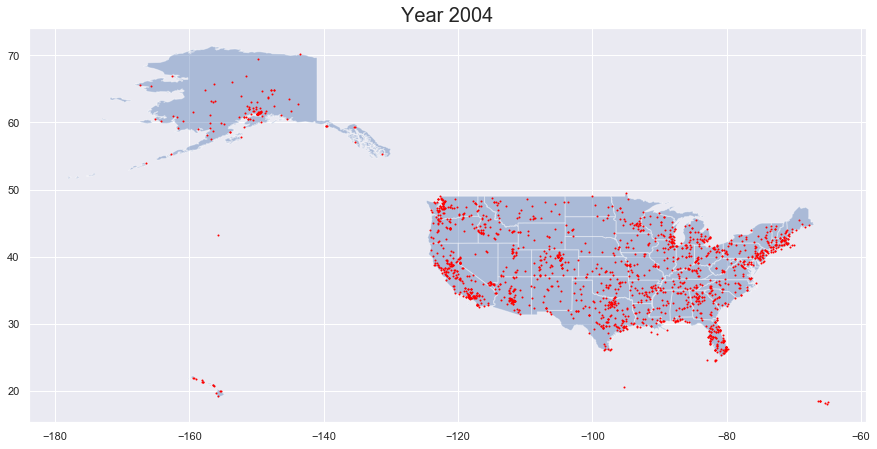

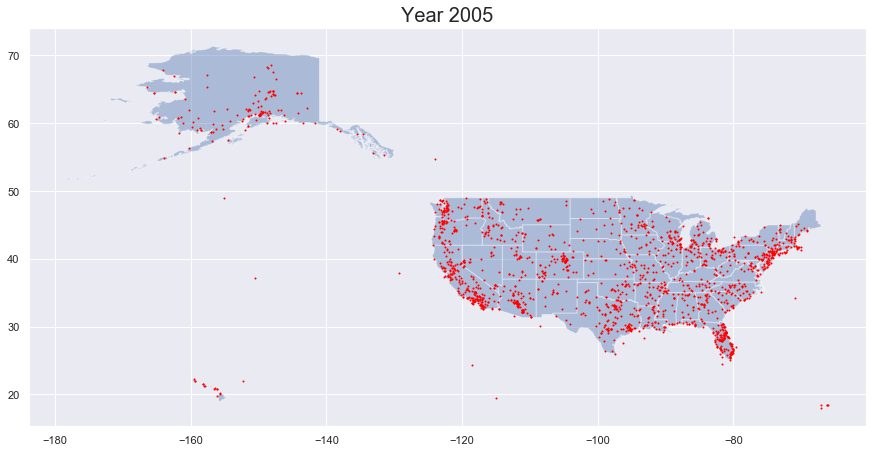

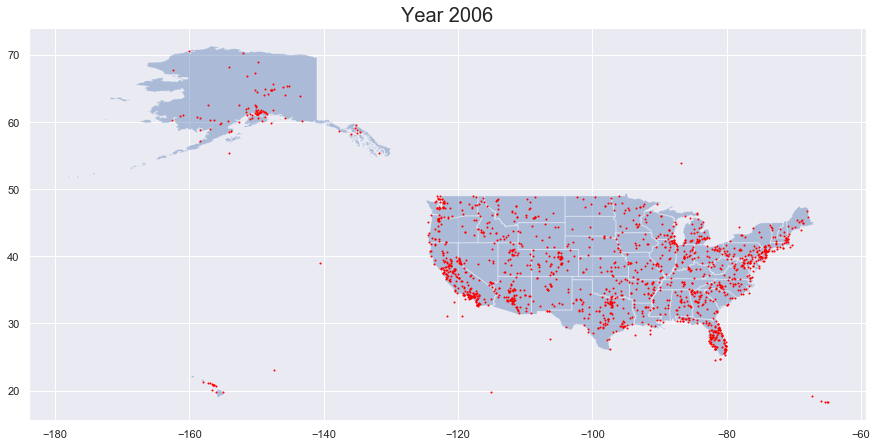

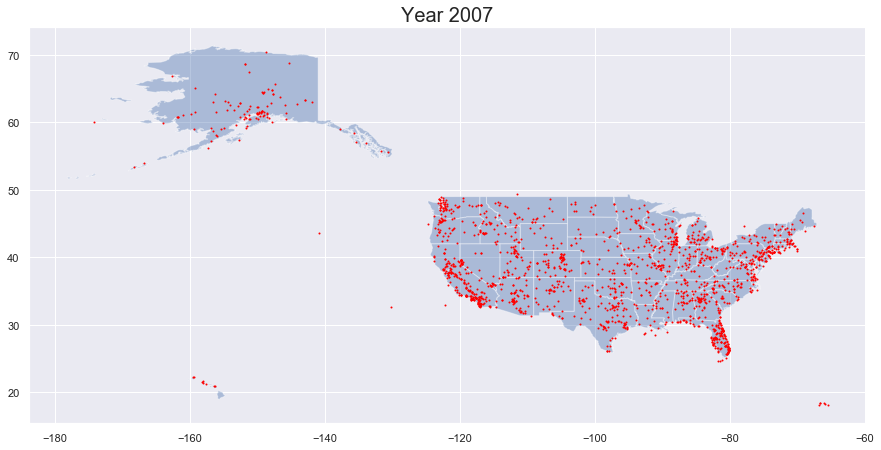

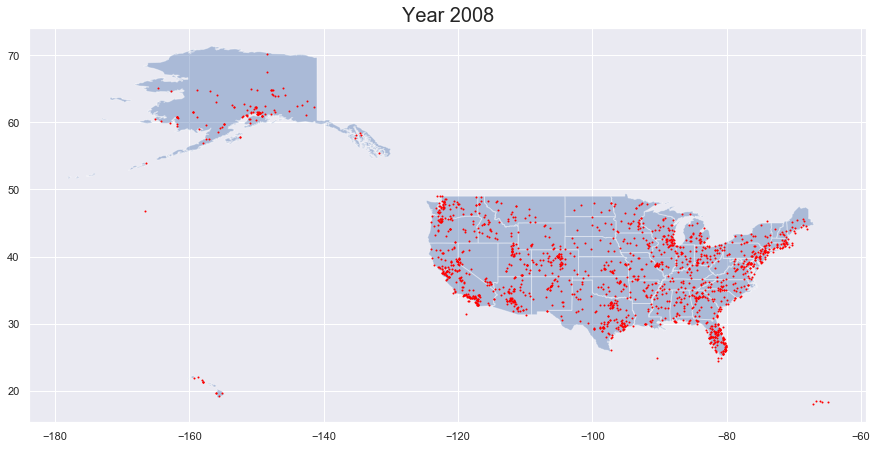

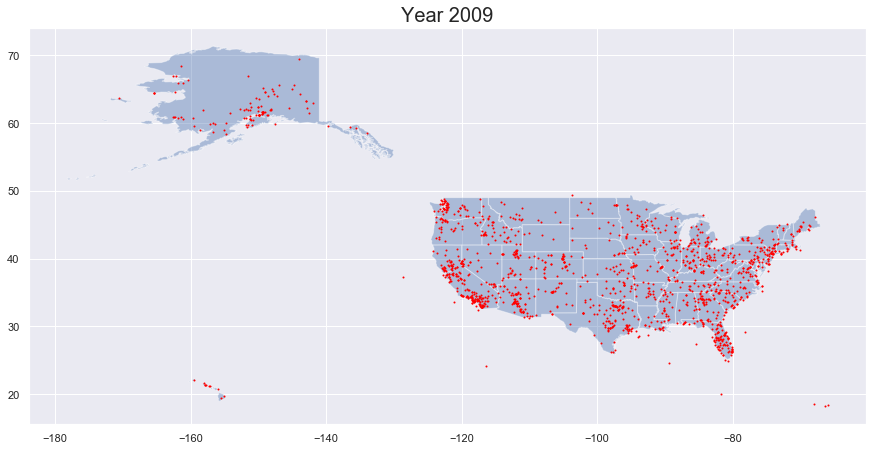

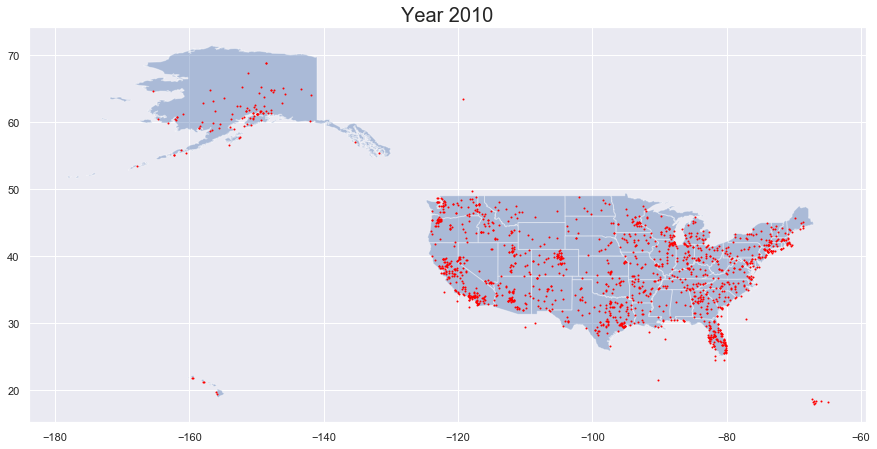

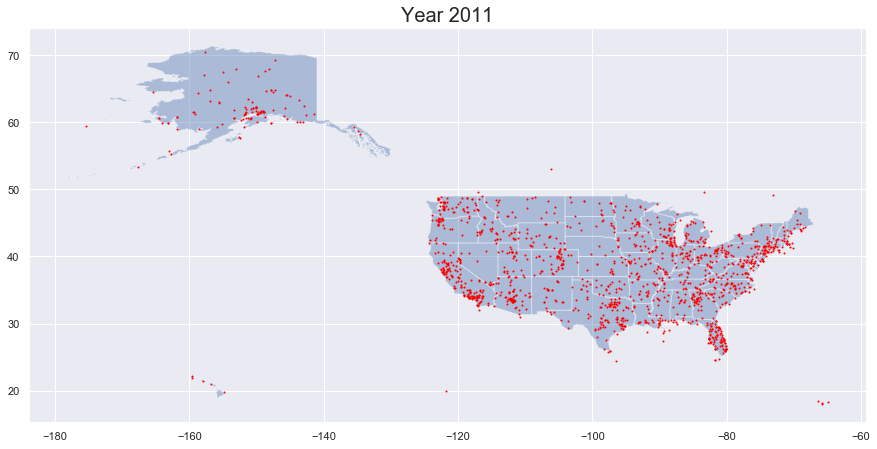

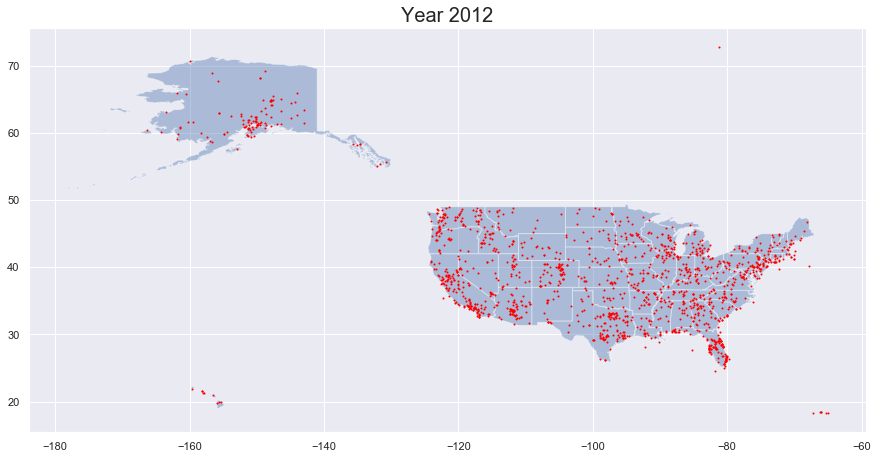

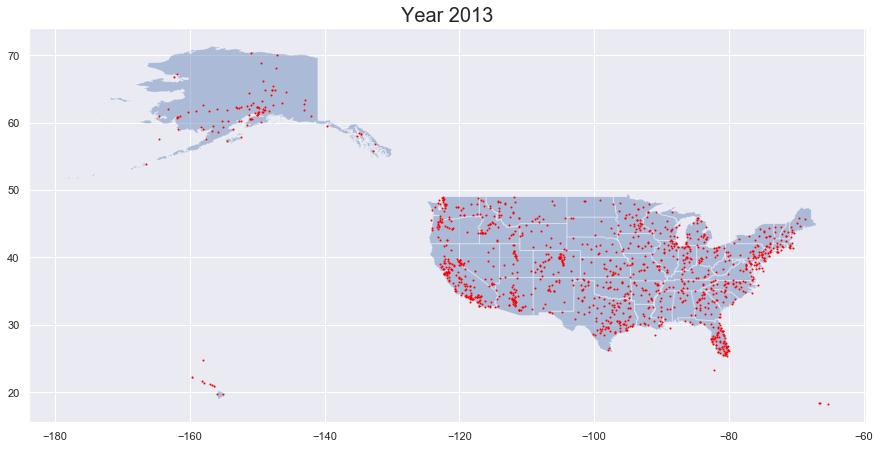

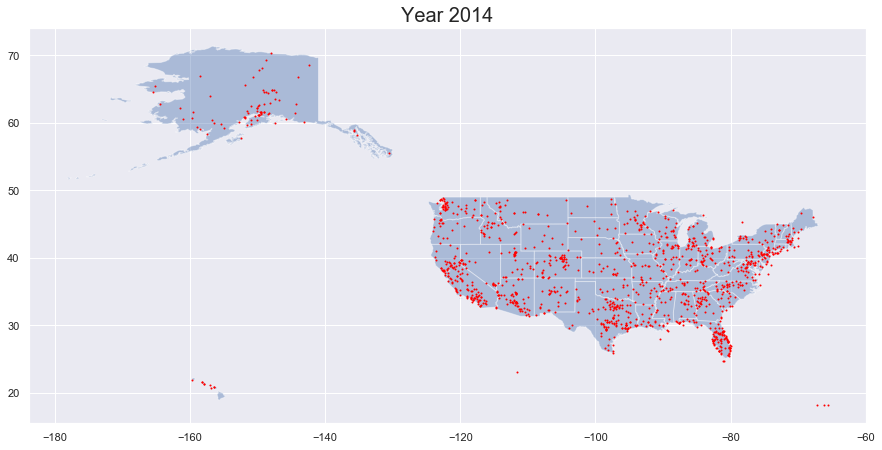

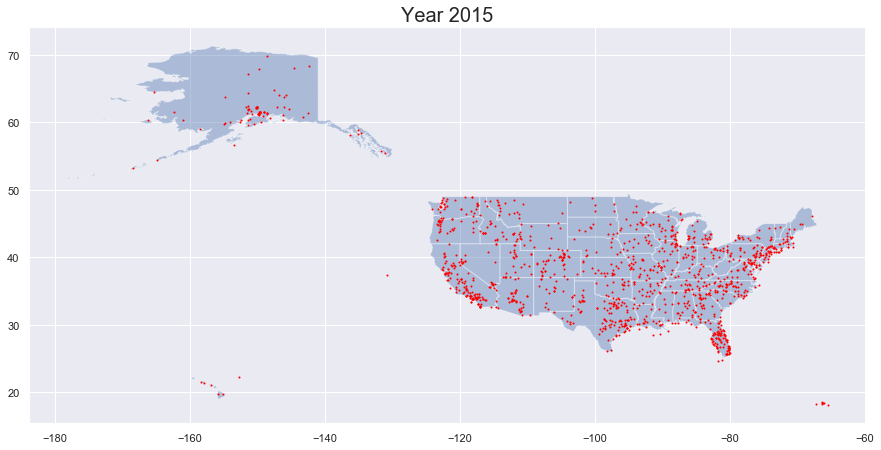

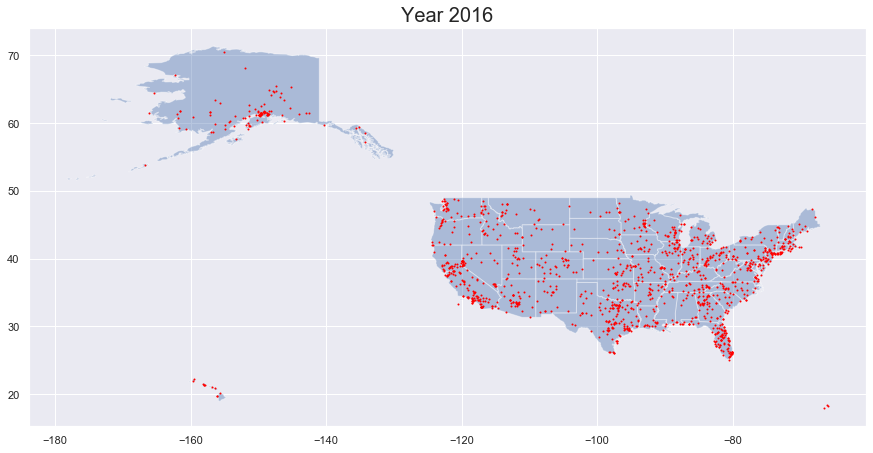

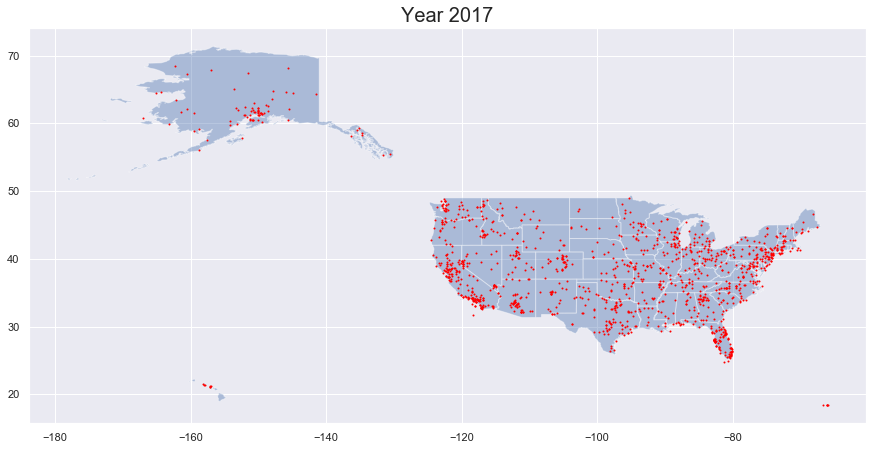

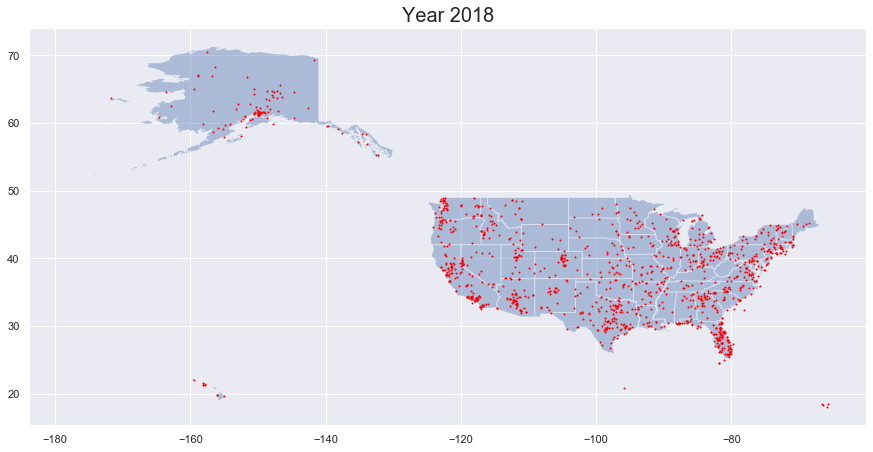

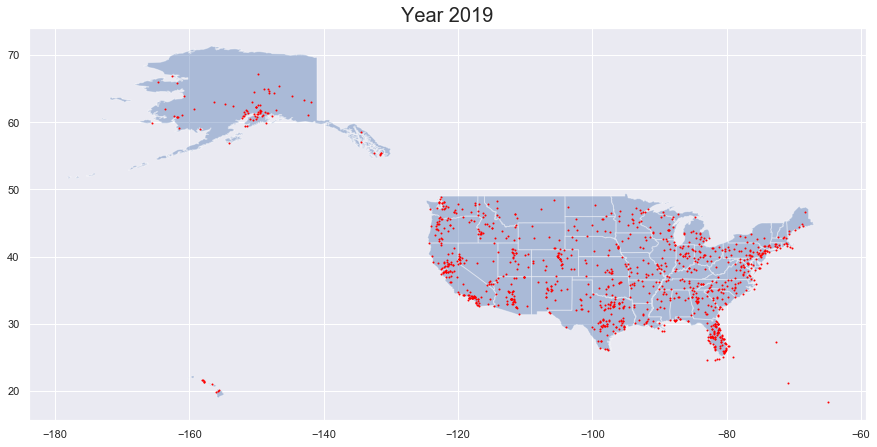

In [63]:
#plotting the map and the data points for 2019
date = pd.DatetimeIndex(aviationdata['Event.Date'])

i = 2000

while i<2020:
    aviationdatayear = aviationdata[date.year == i]
    gdfyear = gpd.GeoDataFrame(aviationdatayear, geometry=gpd.points_from_xy(aviationdatayear.Longitude, aviationdatayear.Latitude))
    fig,ax = plt.subplots(figsize=(15,15))
    usa.plot(ax = ax, alpha = 0.4)
    gdfyear.plot(ax=ax, markersize=1, color='red')
    ax.set_title("Year " + str(i), fontsize = 20)
    i += 1

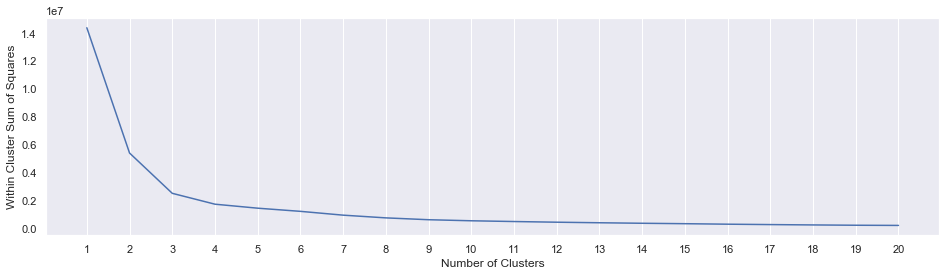

In [64]:
import numpy as np

# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Extract the Features from the Data
X = pd.DataFrame(aviationdata[["Longitude", "Latitude"]])

# Vary the Number of Clusters
min_clust = 1
max_clust = 20

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

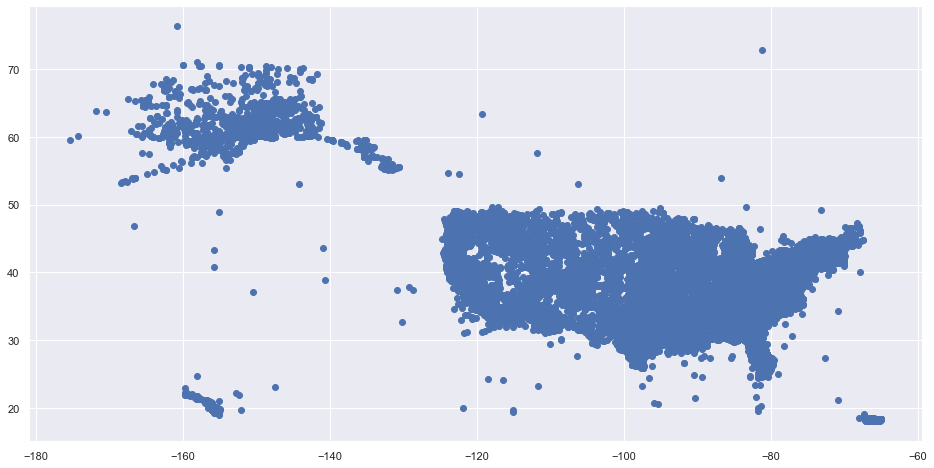

In [65]:
# Extract the Features from the Data
X = pd.DataFrame(aviationdata[["Longitude", "Latitude"]])

# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Longitude", y = "Latitude", data = X)

# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

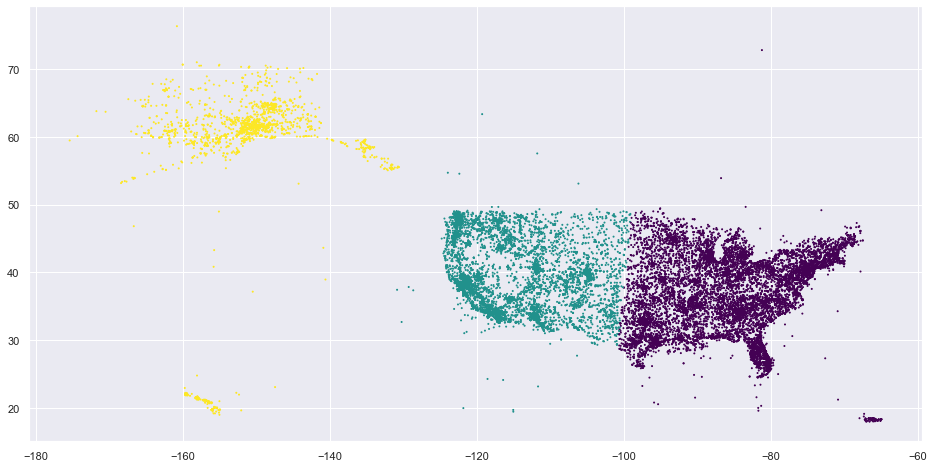

In [66]:
# Guess the Number of Clusters
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Longitude", y = "Latitude", c = "Cluster", cmap = 'viridis', data = X_labeled, s=1)
usa.plot(ax = ax, alpha = 0.4)

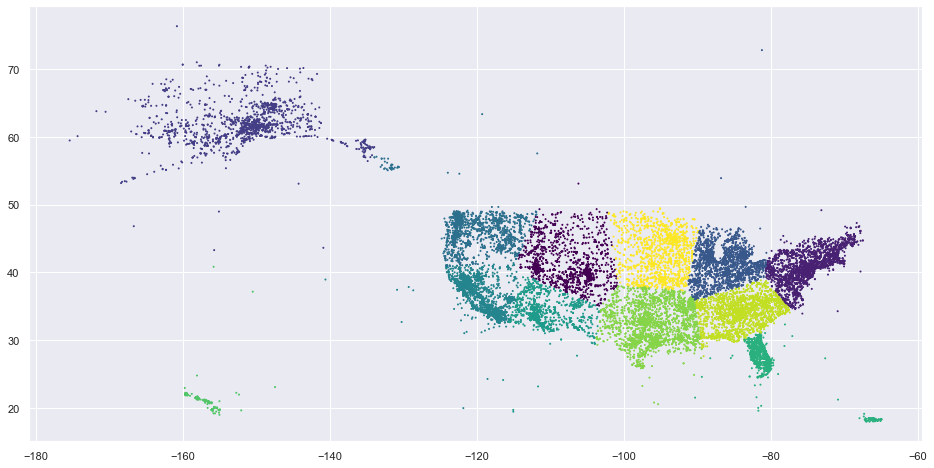

In [67]:
# Guess the Number of Clusters
num_clust = 12

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Longitude", y = "Latitude", c = "Cluster", cmap = 'viridis', data = X_labeled, s=1)
usa.plot(ax = ax, alpha = 0.4)

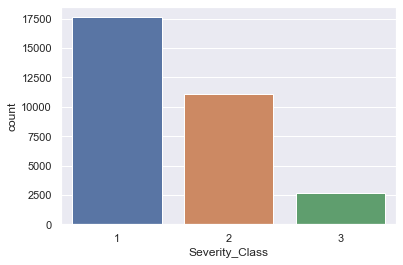

In [68]:
# retrieve the aviation accident updated data
newdata = pd.read_csv("cleandata.csv")
#Creating a new column with the overall categorical indicator 'Severity'
bins = [0.9, 1.251, 9.01, np.inf]
names = [1, 2, 3]

newdata = newdata.assign(Severity_Class = pd.cut(newdata['Severity.Score'], bins, labels=names))
sb.countplot(newdata["Severity_Class"])

In [69]:
# some of the data have a longitude error due to two different formats a longitude value may have
newdata['Longitude'] = -(newdata['Longitude'].abs())

# after some research on the airport locations, it has been found out that some longitude/latitude values are mistyped in the data
newdata = newdata[newdata['Longitude']<-61]
newdata = newdata[newdata['Latitude']>18]
newdata.head(50)

Unnamed: 0  Event.Date        Country   Latitude   Longitude Airport.Code  \
0            0  31/12/2019  United States  39.128611 -123.715833          LLR   
1            1  31/12/2019  United States  38.846111  -94.736111          OJC   
2            2  31/12/2019  United States  64.666945 -148.133334          XXX   
3            3  30/12/2019  United States  32.365556  -97.645000          XXX   
4            5  28/12/2019  United States  30.176111  -92.007500          LFT   
5            6  25/12/2019  United States  31.364167  -85.312500          0J6   
6            9  22/12/2019  United States  34.440000 -114.345555          XXX   
7           10  21/12/2019  United States  38.095833  -87.540555          EVV   
9           12  19/12/2019  United States  28.367500  -97.796389          BEA   
10          13  18/12/2019  United States  43.643889 -116.636944          EUL   
11          14  18/12/2019  United States  39.259167  -84.774445          I67   
13          20  14/12/2019  United States  32.316945 -106.774723          XXX   
14          21  12/12/2019  United States  33.146389 -117.333611         KCRQ   
15          22  11/12/2019  United States  33.683611 -112.110278          DVT   
16          23   9/12/2019  United States  28.852500  -96.918611          XXX   
17          24   8/12/2019  United States  36.984166  -91.955556          1H5   
18          25   8/12/2019  United States  34.479445 -111.989166          XXX   
19          26   7/12/2019  United States  41.194722  -96.112500          MLE   
20          27   7/12/2019  United States  28.919167  -89.653333          XXX   
22          30   4/12/2019  United States  38.836111  -95.181945          K64   
23          31   3/12/2019  United States  39.878611 -111.857222          U14   
24          32   3/12/2019  United States  34.646111  -89.305278          XXX   
25          33   3/12/2019  United States  42.409444  -83.010278          DET   
26          34   2/12/2019  United States  27.645833  -80.427778          VRB   
27          35   1/12/2019  United States  36.380000  -88.990000          UCY   
28          36   1/12/2019  United States  29.550833  -98.499722          SAT   
29          37  30/11/2019  United States  32.766667  -82.810000          XXX   
30          38  30/11/2019  United States  43.765556  -99.337222          9V9   
31          40  29/11/2019  United States  60.504167 -150.151389          XXX   
32          42  26/11/2019  United States  36.400000 -115.180834          VGT   
33          45  25/11/2019  United States  33.685277 -115.267223          XXX   
34          46  24/11/2019  United States  30.637500  -86.993611          2R4   
35          47  23/11/2019  United States  41.916111  -72.776945          4B9   
36          48  23/11/2019  United States  38.069723 -102.688611          LAA   
37          49  23/11/2019  United States  27.260556  -80.847500          OBE   
38          50  23/11/2019  United States  45.440277  -93.970556          8Y6   
39          51  22/11/2019  United States  41.967778 -114.646111          KPT   
40          52  22/11/2019  United States  32.489722  -95.481945          XXX   
41          53  20/11/2019  United States  29.900000  -97.852500         KHYI   
42          54  19/11/2019  United States  39.852222  -76.486389          9W8   
43          55  18/11/2019  United States  38.980556  -76.922223          CGS   
44          56  17/11/2019  United States  41.184444 -112.015000          OGD   
45          59  17/11/2019  United States  41.178334  -78.898611          DUJ   
46          61  17/11/2019  United States  27.067223  -82.440277          VNC   
47          62  16/11/2019  United States  37.696111 -121.819723          LVK   
48          63  16/11/2019  United States  40.478889 -111.433889          HCR   
49          64  16/11/2019  United States  33.714167  -96.674445          GYI   
50          65  16/11/2019  United States  44.521111  -68.641111          XXX   
51          67  15/11/2019  United 

In [70]:
# using GeoDataFrame to put the latitude and longitude into the plotting format
newgdf = gpd.GeoDataFrame(newdata, geometry=gpd.points_from_xy(newdata.Longitude, newdata.Latitude))
newgdf.head(50)

Unnamed: 0  Event.Date        Country   Latitude   Longitude Airport.Code  \
0            0  31/12/2019  United States  39.128611 -123.715833          LLR   
1            1  31/12/2019  United States  38.846111  -94.736111          OJC   
2            2  31/12/2019  United States  64.666945 -148.133334          XXX   
3            3  30/12/2019  United States  32.365556  -97.645000          XXX   
4            5  28/12/2019  United States  30.176111  -92.007500          LFT   
5            6  25/12/2019  United States  31.364167  -85.312500          0J6   
6            9  22/12/2019  United States  34.440000 -114.345555          XXX   
7           10  21/12/2019  United States  38.095833  -87.540555          EVV   
9           12  19/12/2019  United States  28.367500  -97.796389          BEA   
10          13  18/12/2019  United States  43.643889 -116.636944          EUL   
11          14  18/12/2019  United States  39.259167  -84.774445          I67   
13          20  14/12/2019  United States  32.316945 -106.774723          XXX   
14          21  12/12/2019  United States  33.146389 -117.333611         KCRQ   
15          22  11/12/2019  United States  33.683611 -112.110278          DVT   
16          23   9/12/2019  United States  28.852500  -96.918611          XXX   
17          24   8/12/2019  United States  36.984166  -91.955556          1H5   
18          25   8/12/2019  United States  34.479445 -111.989166          XXX   
19          26   7/12/2019  United States  41.194722  -96.112500          MLE   
20          27   7/12/2019  United States  28.919167  -89.653333          XXX   
22          30   4/12/2019  United States  38.836111  -95.181945          K64   
23          31   3/12/2019  United States  39.878611 -111.857222          U14   
24          32   3/12/2019  United States  34.646111  -89.305278          XXX   
25          33   3/12/2019  United States  42.409444  -83.010278          DET   
26          34   2/12/2019  United States  27.645833  -80.427778          VRB   
27          35   1/12/2019  United States  36.380000  -88.990000          UCY   
28          36   1/12/2019  United States  29.550833  -98.499722          SAT   
29          37  30/11/2019  United States  32.766667  -82.810000          XXX   
30          38  30/11/2019  United States  43.765556  -99.337222          9V9   
31          40  29/11/2019  United States  60.504167 -150.151389          XXX   
32          42  26/11/2019  United States  36.400000 -115.180834          VGT   
33          45  25/11/2019  United States  33.685277 -115.267223          XXX   
34          46  24/11/2019  United States  30.637500  -86.993611          2R4   
35          47  23/11/2019  United States  41.916111  -72.776945          4B9   
36          48  23/11/2019  United States  38.069723 -102.688611          LAA   
37          49  23/11/2019  United States  27.260556  -80.847500          OBE   
38          50  23/11/2019  United States  45.440277  -93.970556          8Y6   
39          51  22/11/2019  United States  41.967778 -114.646111          KPT   
40          52  22/11/2019  United States  32.489722  -95.481945          XXX   
41          53  20/11/2019  United States  29.900000  -97.852500         KHYI   
42          54  19/11/2019  United States  39.852222  -76.486389          9W8   
43          55  18/11/2019  United States  38.980556  -76.922223          CGS   
44          56  17/11/2019  United States  41.184444 -112.015000          OGD   
45          59  17/11/2019  United States  41.178334  -78.898611          DUJ   
46          61  17/11/2019  United States  27.067223  -82.440277          VNC   
47          62  16/11/2019  United States  37.696111 -121.819723          LVK   
48          63  16/11/2019  United States  40.478889 -111.433889          HCR   
49          64  16/11/2019  United States  33.714167  -96.674445          GYI   
50          65  16/11/2019  United States  44.521111  -68.641111          XXX   
51          67  15/11/2019  United 

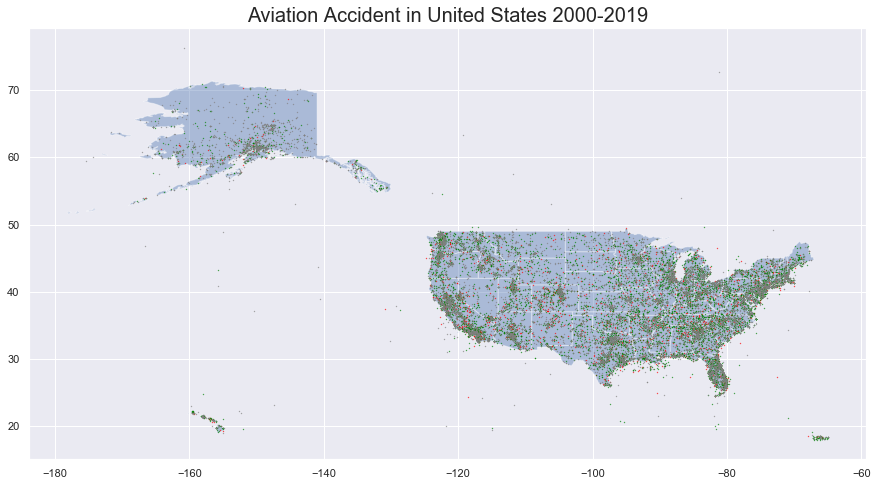

In [71]:
#plotting the map and the data points altogether
fig,ax = plt.subplots(figsize=(15,15))
usa.plot(ax = ax, alpha = 0.4)
newgdf[newgdf['Severity_Class']==3].plot(ax=ax, markersize=0.1, color='red', marker="o", label="Level 3")
newgdf[newgdf['Severity_Class']==2].plot(ax=ax, markersize=0.1, color='green', marker="o", label="Level 2")
newgdf[newgdf['Severity_Class']==1].plot(ax=ax, markersize=0.1, color='grey', marker="o", label="Level 1")
ax.set_title("Aviation Accident in United States 2000-2019", fontsize = 20)
plt.show()

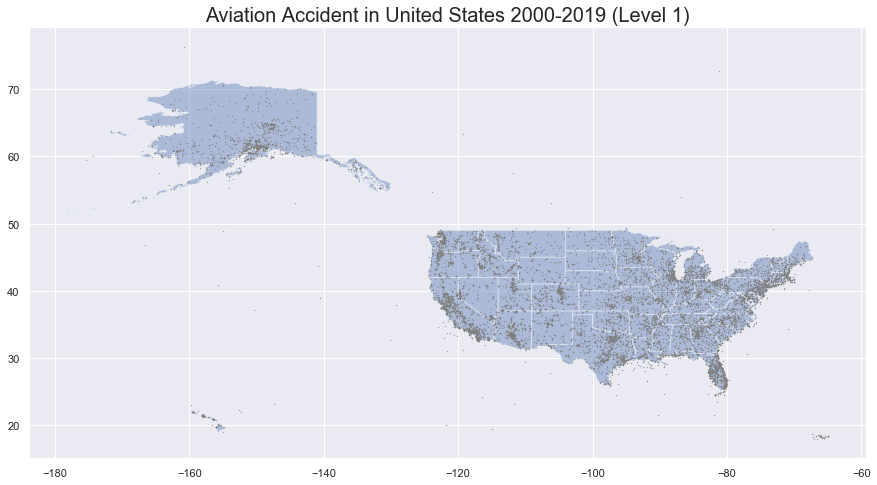

In [72]:
#plotting the map and the data points altogether
fig,ax = plt.subplots(figsize=(15,15))
usa.plot(ax = ax, alpha = 0.4)
newgdf[newgdf['Severity_Class']==1].plot(ax=ax, markersize=0.1, color='grey')
ax.set_title("Aviation Accident in United States 2000-2019 (Level 1)", fontsize = 20)
plt.show()

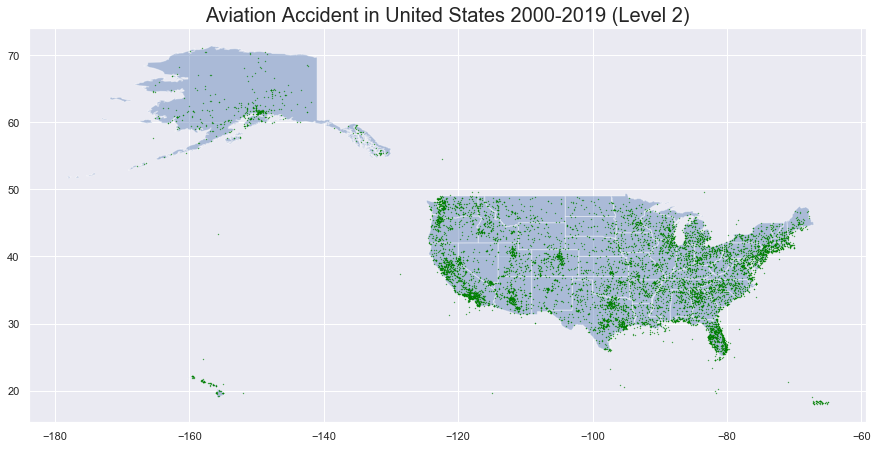

In [73]:
#plotting the map and the data points altogether
fig,ax = plt.subplots(figsize=(15,15))
usa.plot(ax = ax, alpha = 0.4)
newgdf[newgdf['Severity_Class']==2].plot(ax=ax, markersize=0.1, color='green')
ax.set_title("Aviation Accident in United States 2000-2019 (Level 2)", fontsize = 20)
plt.show()

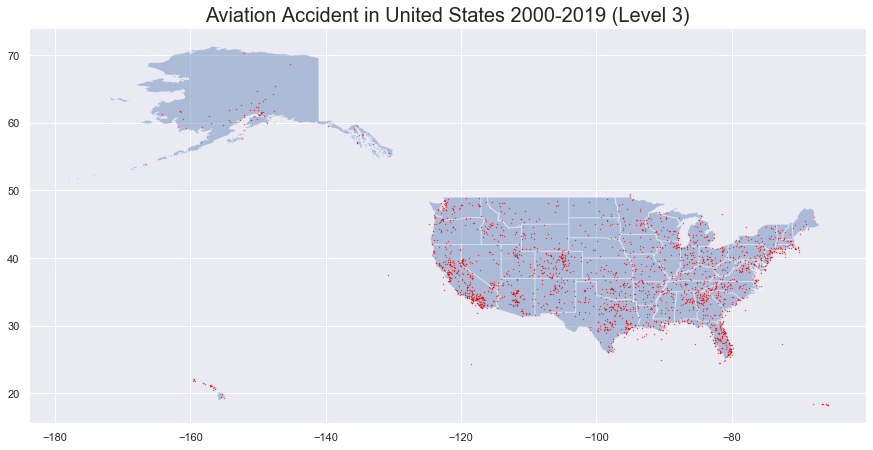

In [74]:
#plotting the map and the data points altogether
fig,ax = plt.subplots(figsize=(15,15))
usa.plot(ax = ax, alpha = 0.4)
newgdf[newgdf['Severity_Class']==3].plot(ax=ax, markersize=0.1, color='red')
ax.set_title("Aviation Accident in United States 2000-2019 (Level 3)", fontsize = 20)
plt.show()

### <font color = #800000> There are no significant clusters that we can see from the graph. However, the majority of the Severity Class 1 accidents occur near the airport, which indicates that a lot of accidents happen during the take-off/landing phase. On the other hand, the locations of Severity Class 3 accidents are much more spread out and further away from airports, indicating that they may occur mostly during further phases such as 'Cruise' ir 'Maneuvering'. Additionally, the West area of mainland US seems to have more accidents due to a higher population density.</font>